## О проекте
<a id='target1'></a>

Этот проект написан для интернет-магазина, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр: оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Задача - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Предоставлены данные до 2015 года и часть данных за 2016 год. 

### План:

1. [Ознакомление с файлом](#target9) 
1. [Предобработка](#target2) 
2. [Понятие актуального периода](#target3)
3. [Анализ жанров](#target4) 
1. [Оценки игроков и критиков](#target5)
2. [Самые популярные игровые платформы](#target6)
3. [Возрастной рейтинг игры](#target7)
4. [Резюме](#target99)

## Ознакомление с файлом
<a id='target9'></a>

In [51]:
from pandas import DataFrame, Series; import pandas as pd; import numpy as np; from IPython.display import display;
import matplotlib.patheffects as path_effects; import matplotlib.lines as mlines; import matplotlib.pyplot as plt;
import scipy.stats as st; import my_module as m; plt.rcParams['figure.facecolor'] = '#1c2423'

Собираем всевозможную информацию, чтобы составить план работы.

In [6]:
df = m.downcast_convertion(pd.read_csv('C:\Xozyain\Downloads\games.csv'))
df.sample(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12995,Myst IV: Revelation,XB,2005.0,Adventure,0.04,0.01,0.00,0.00,75.0,tbd,T
6563,Zoo Tycoon 2: Ultimate Collection,PC,2008.0,Strategy,0.04,0.18,0.00,0.04,NaN,8.4,E
297,Tekken Tag Tournament,PS2,2000.0,Fighting,1.68,1.51,0.51,0.35,85.0,8.5,T


In [7]:
df.set_axis([str.lower(x) for x in df.columns], axis = 1, inplace = True)
df['total_sales'] = df.iloc[:, -7:-3].sum(axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  float32 
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float32 
 5   eu_sales         16715 non-null  float32 
 6   jp_sales         16715 non-null  float32 
 7   other_sales      16715 non-null  float32 
 8   critic_score     8137 non-null   float32 
 9   user_score       10014 non-null  category
 10  rating           9949 non-null   category
 11  total_sales      16715 non-null  float32 
dtypes: category(4), float32(7), object(1)
memory usage: 590.9+ KB


In [2]:
boxplot_sequence??

Object `boxplot_sequence` not found.


In [148]:
m.gaps_duplicated(df)
m.gaps_investigation(df)

,critic_score,user_score,rating
critic_score,-,77.33% match,77.16% match
user_score,77.33% match,-,-
rating,77.16% match,-,-


,name,genre,user_score,rating
name,-,100.00% match,-,-
genre,100.00% match,-,-,-
user_score,-,-,-,96.97% match
rating,-,-,96.97% match,-


I excluded following columns for being dtype='object': ['name']


,total_gaps,pct_of_gaps,min_max,uniques,corr_max,gaps_resp_ly,runner_up,gaps_in_ru
year_of_release,269,2%,1980.0 / 2016.0,38,20: platform,0%,18: user_score,35%
genre,2,0%,-,12,-15: year_of_release,0%,15: critic_score,100%
critic_score,8578,51%,13.0 / 98.0,83,39: total_sales,0%,37: eu_sales,0%
user_score,6701,40%,-,96,72: rating,99%,-35: jp_sales,0%
rating,6766,40%,-,8,72: user_score,98%,34: na_sales,0%


Following columns were not included because of being 'object' dtype:
	-'name' with 2 gaps, which is 0.0% of all values in this column


In [5]:
df [ df['name'].isna() ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [6]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,16715.000000
mean,2006.484619,0.263377,0.145060,0.077617,0.047342,68.967682,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,0.470000
max,2016.000000,41.360001,28.959999,10.220000,10.570000,98.000000,82.539993


In [7]:
df[ df.iloc[:, -4:-1].isna().sum(axis = 1) == 3 ].describe()
    # об играх, у которых пропуски в последних столбцах с рейтингом и оценками

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,6536.000000,6621.000000,6621.000000,6621.000000,6621.000000,0.0,6621.000000
mean,2004.745239,0.186508,0.091216,0.126745,0.022521,NaN,0.426990
std,7.488945,0.804416,0.351057,0.386614,0.093033,NaN,1.369472
min,1980.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,1999.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.040000
50%,2007.000000,0.000000,0.000000,0.020000,0.000000,NaN,0.110000
75%,2010.000000,0.120000,0.050000,0.100000,0.010000,NaN,0.340000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,NaN,40.240002


In [8]:
if df['name'].is_unique:
    print("Значения 'name' уникальны")
else:
    print("Значения 'name' неуникальны. К примеру,")
    not_unique = df[ df.duplicated(subset = 'name') ]['name'].sample(2)
    display( df[ df['name'].isin(not_unique) ].sort_values(by = 'name') )

Значения 'name' неуникальны. К примеру,


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6693,Pro Yakyuu Team o Tsukurou!,SAT,1998.0,Sports,0.00,0.00,0.25,0.00,NaN,NaN,NaN,0.25
6964,Pro Yakyuu Team o Tsukurou!,DC,1999.0,Sports,0.00,0.00,0.23,0.00,NaN,NaN,NaN,0.23
7849,Pro Yakyuu Team o Tsukurou!,DS,2008.0,Sports,0.00,0.00,0.19,0.00,NaN,NaN,NaN,0.19
2486,Tiger Woods PGA Tour 11,PS3,2010.0,Sports,0.37,0.33,0.00,0.13,78.0,6.7,E,0.83
3711,Tiger Woods PGA Tour 11,Wii,2010.0,Sports,0.23,0.25,0.00,0.06,84.0,8.3,E,0.54
3825,Tiger Woods PGA Tour 11,X360,2010.0,Sports,0.28,0.19,0.00,0.05,79.0,7.8,E,0.52


In [9]:
df.duplicated().sum()

0

In [10]:
for column in df.select_dtypes(include = 'category').columns:
    print(f"Уникальные значения '{column}':", df[column].cat.categories.to_list(), end = '\n' * 2)

Уникальные значения 'platform': ['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

Уникальные значения 'genre': ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

Уникальные значения 'user_score': ['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2', '8.3',

In [11]:
df.query('rating == "K-A" or rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A,2.40
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A,1.91
13672,Clockwork Empires,PC,NaN,Strategy,0.00,0.04,0.00,0.00,58.0,3.8,RP,0.04
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.00,0.03,0.00,0.01,63.0,6.8,RP,0.04
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP,0.01
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A,0.01


In [12]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [13]:
df.query("user_score == 'tbd'").describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,2376.000000,2424.000000,2424.000000,2424.000000,2424.000000,1082.000000,2424.000000
mean,2007.450317,0.126052,0.043519,0.002727,0.015862,60.711643,0.188160
std,3.484229,0.180586,0.111412,0.026136,0.039156,11.193035,0.293709
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.010000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000,0.050000
50%,2008.000000,0.075000,0.010000,0.000000,0.010000,62.000000,0.110000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000,0.220000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000,6.700000


In [14]:
df['user_score'] = df['user_score'].replace('tbd', -777777).astype('float')

In [15]:
df[ df.iloc[:, -1] == 0 ]
    # у которых 0 продаж во всех регионах

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


- пропусков в столбце 'platform' нет, а значения 'PC' есть. под PC, скорее всего, скрываются игры, выходящие для персональных компьютеров (personal computer)
- две игры, выпущенные в 1993 году на платформе GEN не имеют названия. этими же двумя играми исчерпываются пропуски в столбце 'genre'. просто удалим эти две строки - в остальных данных об этих двух играх ничего примечательного нет
- грубых дублей и неявных дублей в именах нет
- повторения в столбце 'names' возникают, когда игра выходит на нескольких игровых платформах. тогда одной игре соответствуют несколько строчек, причем в каждой строчке (для релизов на разных платформах) показатели продаж, рейтинга и оценок считаются отдельно.
- в оценках и в рейтинге очень много пропусков - 40%, 40% и 51%. практически все пропуски в столбцах 'rating' и 'user_score' стоят в одних и тех же строчках. и эти строчки составляют 77% от всех пропусков в 'critic_score'. нужно задуматься, почему часть пропусков образуют этот некий блок, и отдельно от них исследовать оставшиеся 23% пропусков в столбце 'critic_score'
- строчки, образующие те самые 77% пропусков имеют показатели продаж и оценок приблизительно в полтора раза ниже, чем в среднем по таблице. впрочем, среди них есть и довольно успешные игры, которые не должны были пройти мимо критиков и пользователей. Например, у 25% из них показатель продаж в Америке выше 120 тысяч копий.
- даже если выбросы есть, аномальных среди них нет - все значения лежат в разумных пределах. единственное, у двух игр нет ни продаж, ни оценок, как будто они были анонсированы, но не выпущены. а может быть, они просто провалились после релиза. в любом случаее, надёжнее их исключить из рассмотрения. распределение остальных выбросов можно исследовать, чтобы убедиться что они образуют "хвост" гистограммы, что они "законны" (регулярны) и аномалий среди них на самом деле нет. но в целом никаких подозрений на их счёт пока не возникает
- игры со значением tbd в 'user_score' - с довольно низкими продажами (среднее в два с половиной раза ниже чем по целой таблице). tbd обычно означает 'to be discovered'. если так, то возникает вопрос: чем отличаются пропуски в этом же столбце от tbd, и почему таких же 'tbd' нет в столбце 'critic_score'? 'tbd' мы сразу заменили на маркер '-777777', чтобы со значениями столбца 'user_score' работать как с числами.
- рейтинга 'K-A' не существует. это какая-то ошибка. игр с таким рейтингом в датасете было три штуки, теперь их рейтинг 'E' (как это на самом деле и есть, информация из открытых источников). рейтинг 'RP' означает rating pending: 'продукт был отправлен в ESRB и ожидает присвоения рейтинга'. этим значением можно будет заполнить пропуски, если не придумаем ничего лучше.
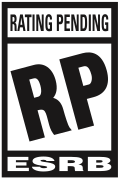

## Предобработка
<a id='target2'></a>

In [16]:
del_1 = df[ df.iloc[:, 4:8].sum(axis = 1) == 0 ].index
del_2 = df [ df['name'].isna() ].index
df.drop(del_1.append(del_2), axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df.loc[ df['user_score'] != -777777, 'user_score'] = df.loc[ df['user_score'] != -777777, 'user_score'].mul(10)

Изучим выбросы. Распределение значений в численных столбцах:

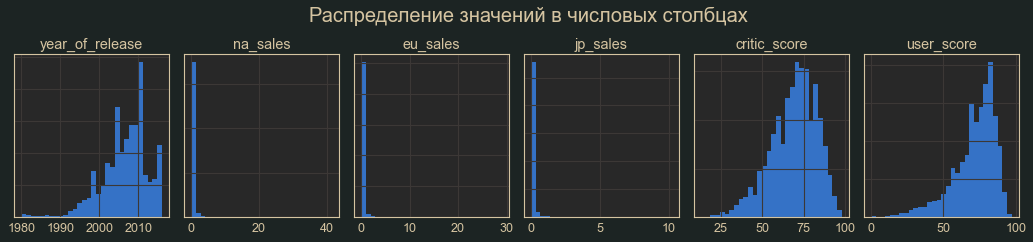

In [17]:
columns = ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'critic_score', 'user_score']

fig = plt.figure(figsize = (18, 3))
grid = fig.add_gridspec(1, 6, wspace = 0.1)
fig.suptitle('Распределение значений в числовых столбцах', fontsize = 20, y = 1.1, x = 0.522)
[fig.add_subplot(grid[0, i]) for i in range(6)]
for ax, col in zip(fig.axes, columns):
    ax.tick_params(labelleft = False)
    if col == 'user_score':
        ax.hist(df[ df['user_score'] != -777777 ][col], bins = 30, density = True)
    else:
        ax.hist(df[col], bins = 30, density = True)
    ax.set(title = col)

Аномалий в распределении значений по гистограммам не видно. Построим гистограммы для столбцов с продажами без нулей. Установим предел по оси Х, чтобы игры с наибольшими продажами не делали графики нечитаемыми, и увеличим их ширину, чтобы видеть больше. 

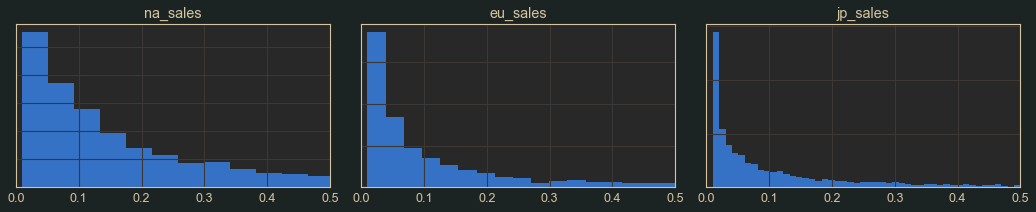

In [18]:
columns = ['na_sales', 'eu_sales', 'jp_sales']

fig = plt.figure(figsize = (18, 3))
grid = fig.add_gridspec(1, 3, wspace = 0.1)
[fig.add_subplot(grid[0, i]) for i in range(3)]
for ax, col in zip(fig.axes, columns):
    ax.tick_params(labelleft = False)
    ax.hist(df.loc[ df[col] != 0, col], bins = 1000)
    ax.set(title = col, xlim = (0, 0.5))

Даже с исключенными нулями график чрезвычайно скошен вправо, а пик всё-таки на нуле. Значит, во всех регионах большинство игр не продаются совсем или продаются мало. Это логично. Больше всего шансов на ноль продаж в Японии, меньше всего - в Северной Америке. Скорее всего, большая часть игр в выборке - американского производства. Как в жизни. Обратим также внимания на то, что в предел от 0 до 500 тысяч проданных копий в Японии уложилось гораздо больше корзин (столбцы на гистограмме узкие, их довольно много), чем в Северной Америке. Это говорит о том, что у графика для Северной Америки будет куда более длинный хвост - много корзин для продаж свыше 500 тысяч копий. 
  
Данные по-прежнему не вызывают подозрений. Максимальные значения продаж в регионах: 41 миллион в Америке, 26 - в Европе и 10 - в Японии. Адекватные ли это цифры? У игры GTA V суммарные продажи по всем платформам - 130 млн. копий (данные из открытых источников). Так что - да. На всякий случай выведем пару максимальных значений и проверим их в открытых источниках.

In [19]:
df.loc[ df['na_sales'].idxmax() ]

name               Wii Sports
platform                  Wii
year_of_release          2006
genre                  Sports
na_sales                41.36
eu_sales                28.96
jp_sales                 3.77
other_sales              8.45
critic_score               76
user_score                 80
rating                      E
total_sales             82.54
Name: 0, dtype: object

In [20]:
df.loc[ df['jp_sales'].idxmax() ]

name               Pokemon Red/Pokemon Blue
platform                                 GB
year_of_release                        1996
genre                          Role-Playing
na_sales                              11.27
eu_sales                               8.89
jp_sales                              10.22
other_sales                               1
critic_score                            NaN
user_score                              NaN
rating                                  NaN
total_sales                           31.38
Name: 4, dtype: object

Все правильно, игра Pokemon Red/Pokemon Blue в своё время была даже занесена в Книгу рекордов Гиннесса за большое количество продаж.

Теперь нужно изучить три вида пропусков:
- пропуски в 'year_of_release'
- пропуски в столбцах 'critic_score', 'user_score', 'rating' в одних и тех же строчках
- оставшиеся 23% пропусков в 'critic_score'

Распределение 23% пропусков из 'critic_score' в остальных столбцах:

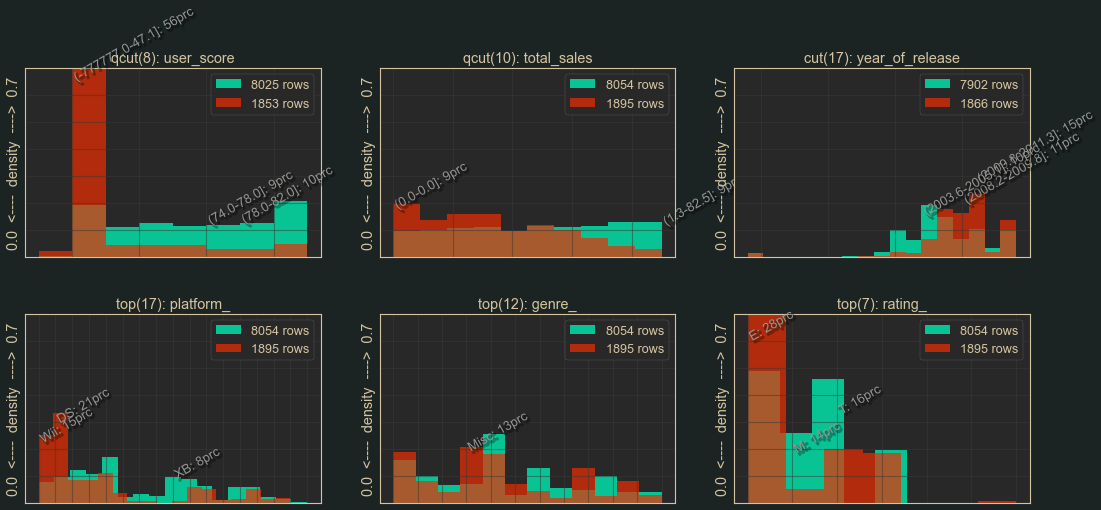

In [21]:
m.gaps_histograms(df[ df['rating'].notna() ], 'critic_score', 
                  'user_score', 'rating', 'total_sales', 'platform', 'genre', 'year_of_release', rotation = 30)

Есть смысл изучить проникновение значений 'tbd' и "уникальных" пропусков в 'critic_score' в одни строчки.

In [22]:
prc = (df[ (df['user_score'] == -777777) & df['critic_score'].isna() ].shape[0] / 
       df[ (df['user_score'] == -777777) ].shape[0])
print("{:.1%} от строк с 'tbd' в столбце 'user_score' имеют пропуск в 'critic_score'".format(prc))

55.4% от строк с 'tbd' в столбце 'user_score' имеют пропуск в 'critic_score'


In [23]:
prc = (df.loc[ (df['rating'].notna()) & (df['critic_score'].isna()) & (df['user_score'] == -777777)].shape[0] / 
       df.loc[ (df['rating'].notna()) & (df['critic_score'].isna())].shape[0])
print("В {:.1%} строк с уникальными пропусками в 'critic_score' (то есть теми, которые не сопровождаются пропусками\nв рейтинге и в пользовательских оценках) стоит значение 'tbd' в 'user_score'".format(prc))

В 68.4% строк с уникальными пропусками в 'critic_score' (то есть теми, которые не сопровождаются пропусками
в рейтинге и в пользовательских оценках) стоит значение 'tbd' в 'user_score'


"Уникальные" пропуски столбца 'user_score' преобладают в тех строчках, где:
- ...в столбце 'user_score' стоит 'tbd' (мода)
- ...описываются игры, вышедшие с 2006 по 2010 год
- ... платформа - Wii или DS (третий по весомости индикатор)
- ...жанр игры - Misc
- ...рейтинг игры - E, вряд ли - где M или T (второй по весомости индикатор)
- ...продажи игры скорее низкие, чем высокие

Складывается впечатление, что эти моменты описывают какую-то определённую группу. Можно предположить, что один регион. Хотя выявить предпочтения предстоит в рамках анализа (а не предобработки), попробуем как-нибудь коротко разобраться, в регионе ли дело. Сравним таблички `describe()` для этой выборки и для датафрейма.

In [24]:
(display(df[ (df['critic_score'].isna()) & 
             (df['user_score'] == -777777) & 
             ((df['platform'] == 'Wii') | (df['platform'] == 'DS')) & 
             (df['rating'] == 'E') ].describe()))
display(df.describe())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,642.000000,653.000000,653.000000,653.000000,653.000000,0.0,653.0,653.000000
mean,2009.123047,0.151730,0.038331,0.000536,0.016769,NaN,-777777.0,0.207366
std,1.365544,0.207119,0.141296,0.007463,0.034951,NaN,0.0,0.356873
min,2004.000000,0.000000,0.000000,0.000000,0.000000,NaN,-777777.0,0.010000
25%,2008.000000,0.040000,0.000000,0.000000,0.000000,NaN,-777777.0,0.050000
50%,2009.000000,0.090000,0.000000,0.000000,0.010000,NaN,-777777.0,0.120000
75%,2010.000000,0.180000,0.010000,0.000000,0.020000,NaN,-777777.0,0.240000
max,2015.000000,3.450000,2.590000,0.160000,0.660000,NaN,-777777.0,6.700000


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16442.000000,16711.000000,16711.000000,16711.000000,16711.000000,8137.000000,10014.000000,16711.000000
mean,2006.486084,0.263334,0.145063,0.077634,0.047348,68.967682,-188215.563911,0.533379
std,5.875859,0.813609,0.503386,0.308888,0.186752,13.938165,333193.233876,1.548364
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,-777777.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,24.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,69.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,80.000000,0.470000
max,2016.000000,41.360001,28.959999,10.220000,10.570000,98.000000,97.000000,82.539993


В дополнение к вышесказаному:

- большая часть от строк с этими пропусками выпущены в короткий промежуток с 2008 по 2010 год, среди остальных разброс по годам тоже не велик, std низкое.
- если в среднем продажи игры в Европе ниже чем в Америке в два раза, а в Японии по сравнению с Америкой - ниже в 4 раза, то для этой выборки показатель продаж в Европе в среднем в 4 раза меньше, чем в Америке, а в Японии - в 300 раз. Это игры однозначно не японского происхождения, а скорее американского, притом настолько непопулярные, что за пределы Америки почти не вышли
- средние продажи в 2.5 раза меньше, чем в среднем у остальных игр, отклонение от этой величины сравнительно низкое

Мы, очевидно, описываем какую-то конкретную группу игр. Нет возможности выяснить, в связи с чем в этой группе в рассматриваемых столбцах возникли пропуски. Так как данные брались из открытых источников, каждый такой случай, вероятнее всего, как-то связан со своим источником.

Распределение пропусков из столбцов 'critic_score', 'user_score', 'rating' в остальных столбцах:

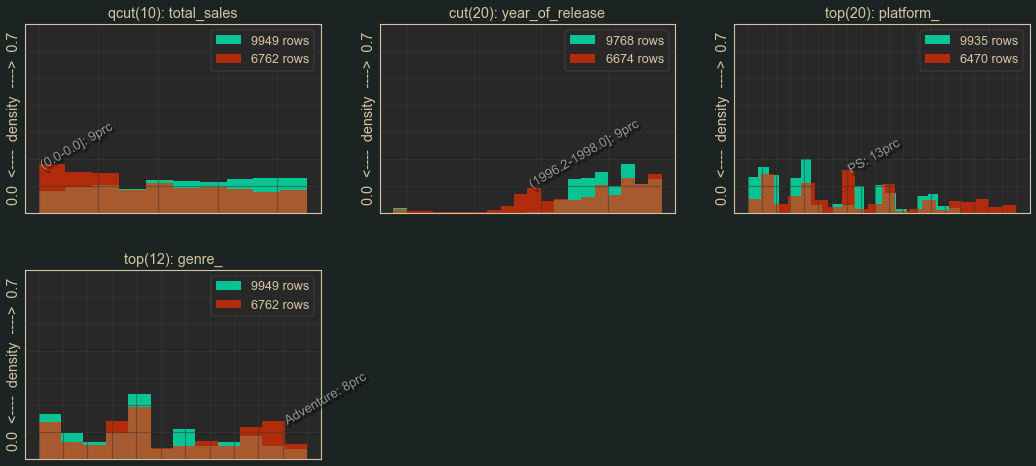

In [25]:
m.gaps_histograms(df, 'rating', 
                  'total_sales', 'platform', 'genre', 'year_of_release', rotation = 30)

Здесь пропусков больше в играх, вышедших давно, заработавших мало и вышедших на PС, однако в целом распределение довольно близкое к тому, что у строк без пропусков. Занимать место гистограммами для пропусков в 'year_of_release' я даже не буду - в их распределении нет даже таких незначительных особенностей. Что же делать?

Переменная 'year_of_release' имеет 0.2 корреляцию со столбцом 'platform'. Действительно, многие игровые платформы актуальны на протяжении недолгого времени, хотя некоторые присутствуют на рынке десятилетиями (например, PC).

In [26]:
platforms_by_years = pd.pivot_table(df, columns = 'year_of_release', 
                                        index = 'platform', 
                                        values = 'name',
                                        aggfunc = 'count').replace(0, np.nan).dropna(how = 'all', axis = 1)

def calc_years(row):
    first_four_sum = row.sort_values(ascending = False).iloc[:4].sum()
    first_four_index = list(row.sort_values(ascending = False).iloc[:4].index)
    if (first_four_sum / row.sum() > 0.75) and (max(first_four_index) - min(first_four_index) <= 4):
        return row.idxmax(axis = 1)
    
mapping_table_years = platforms_by_years.apply(calc_years, axis = 1)
mapping_table_years

platform
2600    1981.0
3DO        NaN
3DS     2011.0
DC      2000.0
DS      2008.0
GB         NaN
GBA     2002.0
GC      2002.0
GEN     1994.0
GG         NaN
N64     1999.0
NES        NaN
NG      1994.0
PC         NaN
PCFX       NaN
PS         NaN
PS2        NaN
PS3        NaN
PS4     2016.0
PSP        NaN
PSV     2015.0
SAT     1995.0
SCD        NaN
SNES    1995.0
TG16       NaN
WS         NaN
Wii     2009.0
WiiU    2013.0
X360       NaN
XB      2003.0
XOne    2016.0
dtype: float64

Смысл в следующем: если за четыре года наибольших продаж на некоторую платформу было продано более 75% от всех когда-либо проданных на неё игр, и если эти годы идут друг за другом (макс. 1 год разрыва), то пропуск в столбце 'year_of_release' мы заполним тем годом, за который продаж было больше всего. Смысл не в том, чтобы угадать значение года точно, а в том, чтобы отнести строчку к соответствующему ей историческому времени, так как именно это понадобится для анализа.

In [27]:
print(f"Было {df['year_of_release'].isna().sum()} пропусков в столбце 'years_of_release'")
df.loc[ df['year_of_release'].isna(), 'year_of_release'] = (df.loc[ df['year_of_release'].isna(), 
                                                                   'platform']
                                                            .map(mapping_table_years))
print(f"Стало {df['year_of_release'].isna().sum()}")

Было 269 пропусков в столбце 'years_of_release'
Стало 130


Числовые столбцы для заполнения последней группы пропусков использовать не следует - нет корреляции. Можно найти медиану 'critic_score', 'user_score' и моду 'rating' для категоральных переменных, но не для всех. Дело в здравом смысле: оценка пользователей, критиков и возрастной рейтинг не могут непосредственно зависить от жанра, года выпуска или платформы. Если мы для всех категорий вычислим медиану и этой медианой заполним пропуски, то внесём заведомо некорректную информацию. С другой стороны, не исключено, что у некоторых категорий значения 'critic_score' и 'user_score' лежат в узких границах. 

Распределения в 'user_score' и 'critic_score', которые мы видели выше, нельзя назвать нормальными, но больше половины значений всяко будут лежать в пределах одной сигмы. Если допустим погрешность 'user_score' и 'critic_score' в 18 баллов, сигма не должна быть больше 9. Выведем медиану для групп, в которых значение std в столбцах 'critic_score' и 'user_score' не будет превышать 9. Поскольку формула, вычисляющая std очень чувствительна к выбросам, возьмём усечённый срез - с 5 по 95 квантиль. Что касается rating, выведем рейтинги, встречающиеся в некоторых категориях чаще 60%.

In [28]:
mapping_table = []
df['platform'] = df['platform'].astype('object')
no_outliers = df[  (df['user_score'] != -777777) &
                   (df['user_score'] > df['user_score'].quantile(.05)) & 
                   (df['user_score'] < df['user_score'].quantile(.95)) &
                   (df['critic_score'] > df['critic_score'].quantile(.05)) & 
                   (df['critic_score'] < df['critic_score'].quantile(.95))    ]

def us_sc_median(row, col):
    return no_outliers[ no_outliers[col] == row.name ]['user_score'].median()
    
def cr_sc_median(row, col):
    return no_outliers[ no_outliers[col] == row.name ]['critic_score'].median()

for i, col in enumerate(['platform', 'year_of_release', 'genre']):
    
    if col != 'year_of_release':
        threshold = 9.5
    else:
        threshold = 9

    groupby_user_std = no_outliers.groupby(col).agg({'user_score': 'std'})
    groupby_user_std = groupby_user_std[ groupby_user_std < threshold ].dropna()
    groupby_user_std = groupby_user_std.apply(us_sc_median, args = (col,), axis = 1)
    
    groupby_critic_std = no_outliers.groupby(col).agg({'critic_score': 'std'})
    groupby_critic_std = groupby_critic_std[ groupby_critic_std < threshold ].dropna()
    groupby_critic_std = groupby_critic_std.apply(cr_sc_median, args = (col,), axis = 1)
    
    groupby_rating = no_outliers.groupby(col)['rating'].value_counts(normalize = True)
    groupby_rating = groupby_rating[groupby_rating > 0.6]
    groupby_rating.name = ''
    groupby_rating = groupby_rating.reset_index(level = 1).iloc[:, :1]
    
    if i == 0:
        map_platf = pd.concat([groupby_user_std, groupby_critic_std, groupby_rating], axis = 1)
        map_platf.columns = ['user_score', 'critic_score', 'rating']
        display(map_platf)
    elif i == 1:
        map_years = pd.concat([groupby_user_std, groupby_critic_std, groupby_rating], axis = 1)
        map_years.columns = ['user_score', 'critic_score', 'rating']        
        display(map_years)
    elif i == 2:
        map_genre = pd.concat([groupby_user_std, groupby_critic_std, groupby_rating], axis = 1)
        map_genre.columns = ['user_score', 'critic_score', 'rating']
        display(map_genre)
                        
df['platform'] = df['platform'].astype('category')

,user_score,critic_score,rating
DC,79.5,82.5,NaN
GBA,NaN,NaN,E


,user_score,critic_score,rating
year_of_release,,,
1985.0,NaN,NaN,T
1988.0,NaN,NaN,E10+
1992.0,NaN,NaN,M
1994.0,NaN,NaN,T
1996.0,79.5,84.5,NaN
1997.0,82.0,83.0,NaN
1998.0,82.5,NaN,NaN
1999.0,82.0,79.0,NaN


,user_score,critic_score,rating
genre,,,
Fighting,NaN,NaN,T
Puzzle,NaN,NaN,E
Shooter,NaN,NaN,M
Sports,NaN,NaN,E


Маркеры для 'tbd' меняем на пропуски. Если какие-то из них получится заполнить - отлично. Смешать 'tbd' с пропусками уже не страшно, так как мы изучили и те, и другие, и существенных отличий между ними не выявили.

In [29]:
df = df.replace(-777777, np.nan)
print('Было:')
print(f"\t- {df['user_score'].isna().sum()} пропусков в столбце 'user_score'", f"\t- {df['critic_score'].isna().sum()} пропусков в столбце 'critic_score'", f"\t- {df['rating'].isna().sum()} пропусков в столбце 'rating'", sep = '\n')

for map_map, col in zip([map_platf, map_genre, map_years], ['platform', 'genre', 'year_of_release']):
    df.loc[ df['user_score'].isna(), 'user_score' ] = df.loc[ df['user_score'].isna(), col ].map(map_map['user_score'].dropna())
    df.loc[ df['critic_score'].isna(), 'critic_score' ] = df.loc[ df['critic_score'].isna(), col ].map(map_map['critic_score'].dropna())
    df.loc[ df['rating'].isna(), 'rating' ] = df.loc[ df['rating'].isna(), col ].map(map_map['rating'].dropna())                        
                        
print('Осталось после заполнения пропусков:')
print(f"\t- {df['user_score'].isna().sum()} пропусков в столбце 'user_score'", f"\t- {df['critic_score'].isna().sum()} пропусков в столбце 'critic_score'", f"\t- {df['rating'].isna().sum()} пропусков в столбце 'rating'", sep = '\n')            

Было:
	- 9121 пропусков в столбце 'user_score'
	- 8574 пропусков в столбце 'critic_score'
	- 6762 пропусков в столбце 'rating'
Осталось после заполнения пропусков:
	- 7917 пропусков в столбце 'user_score'
	- 7718 пропусков в столбце 'critic_score'
	- 4625 пропусков в столбце 'rating'


Больше рассчитывать не на что. Надо решить, что делать с оставшимися пропусками. Стоит ли заполять пропуски таким значением, которое потом отовсюду придётся исключать, и это - только ради столбцов целочисленного формата? Столбцы float плохи тем, что вычисления с дробной частью чисел могут быть долгими и неверными, а также тем, что под значения float отводится больше памяти, чем под натуральные числа. Если мы умножим оценки пользователей на 10 (что уже сделано), то в дробной части у нас всегда будет ноль - так мы избавимся от первого недостатка, а кроме того, приведём оценки пользователей и критиков к одной мере (от 0 до 100). Со вторым недостатком можно смириться, датафрейм сам по себе небольшой. В итоге, оставляем пропуски. 

In [30]:
df['rating'] = df['rating'].fillna('RP')

## О нынешнем (актуальном) периоде на рынке компьютерных игр
<a id='target3'></a>

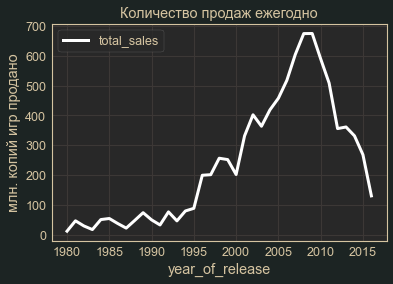

In [31]:
(df.groupby('year_of_release').agg({'total_sales': 'sum'})
                              .plot(color = 'white', linewidth = 3, ylabel = 'млн. копий игр продано',
                                    title = 'Количество продаж ежегодно'));

С 2009 года в индустрии спад продаж, который продолжается до сих пор. Актуальный период должен быть не раньше 2009, но 7 лет (с 2009 по 2016) - долгий срок, особенно для такой стремительно развивающейся индустрии как компьютерные игры. Что изменилось за эти семь лет?

Отслеживать изменения по числу продаж, наверное, не лучшая идея - продажи, как мы убедились по графику, будут падать. Посмотрим, а не стало ли меньше игр выпускаться с 2009 года. Если нет, то можно будет по количеству выпущенных игр для жанров, рейтингов и платформ отследить изменения на рынке за семь лет. А если 2009 - это кризис, и количество выпущенных игр с этого момента тоже непрерывно падает, то останется ориентироваться разве что на оценки от игроков и критиков.

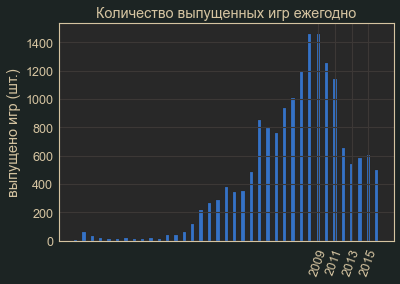

In [32]:
for_histogram = df['year_of_release'].value_counts().sort_index()
plt.bar(for_histogram.index, for_histogram, width = 0.4, ec = 'k')
plt.ylabel("выпущено игр (шт.)")
plt.title('Количество выпущенных игр ежегодно')
plt.xticks(np.arange(2009, 2017, 2), rotation = 70);

In [11]:
df['genre'].astype('object').where(df['genre'].isin(['Adventure', 'Sports', 'Shooter']), 'Other').value_counts().sort_index()

Adventure     1303
Other        11741
Shooter       1323
Sports        2348
Name: genre, dtype: int64

In [77]:
def pie_chart(df, col, dec = 0, cmap = 'tab20b', title = '', include = []):
    """
    Рисует круговую диаграмму. Первый аргумент - датафрейм, второй - столбец, уникальные 
    значения которого будут отображены на диаграмме. Посредством параметра 'include =' 
    можно передать список категорий, которые отобразятся на диаграмме (остальные
    будут объеденены под именем 'Others'). 'title =' - заголовок, 'dec =' - сколько знаков
    после запятой будет отображаться рядом с категориями (по умолчанию - 0), 'cmap =' -
    какая цветовая палитра будет использована (по умолчанию 'cividis' или 'tab20b' в 
    зависимости от количества категорий).
    """
    if 'plt' not in dir():
        import matplotlib.pyplot as plt
    if 'pd' not in dir():
        import pandas as pd
    if not 'display' in dir():
        from IPython.display import display
        
    dec = '{:.' + str(dec) + '%}'
        
    if len(include) != 0:
        include = list(include)
        for_pie = df[col].astype('object').where(df[col].isin(include), 'Other').value_counts().sort_index()
        labels = (df[col].astype('object').where(df[col].isin(include), 'Other')
                  .value_counts(normalize = True).sort_index().apply(dec.format))
    else:
        for_pie = df.loc[:, col].astype('object').value_counts().sort_index()
        labels = df.loc[:, col].astype('object').value_counts(normalize = True).sort_index().apply(dec.format)
        
    leng = for_pie.shape[0]
    cmap = plt.get_cmap(cmap, leng)
    labels = (labels + ': ' + labels.index).to_list()

    fig, ax = plt.subplots(figsize = (7, 7))
    ax.set_title(title, fontsize = 20)
    wedges, texts = ax.pie(for_pie, wedgeprops = {'width': 0.5}, labels = labels, colors = cmap(range(leng)))
                           
    display(fig)
    plt.close(fig)

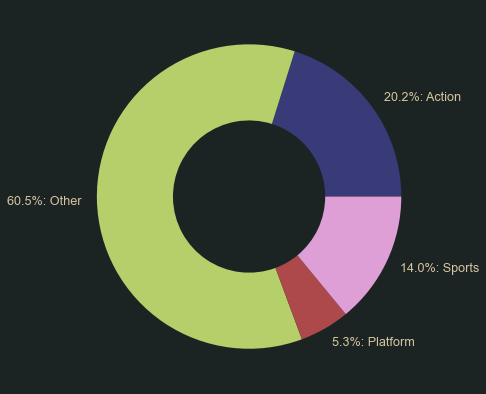

In [78]:
pie_chart(df, 'genre', include = ['Sports', 'Action', 'Platform'], dec = 1)

Само собой, на самом деле выпущено было больше 1400 игр. Мы имеем дело с репрезентативной выборкой, поэтому распределению можно верить.

Количество выпущенных игр практически точно совпадает с числом проданных копий, графики практически одинаковые. Это значит, предложение всегда точно совпадало со спросом.

2016 в расчёт не берём, когда речь об абсолютных цифрах, поскольку в данные за 2016 неполные. Когда речь об абсолютных цифрах, сравниваем 2015 и 2012 год, потому что, судя по гистограмме сверху, кол-во выпущенных игр в 2015 году сопоставимо с количеством игр, выпущенных в 2012. 
  
И сравниваем 2009 (2012) год с 2016 (2015), чтобы найти, что за эти семь лет поменялось на рынке. Как только найдём, то сможем уточнить, с которого года на рынке установилась такая структура, которая актуальна по сей день.

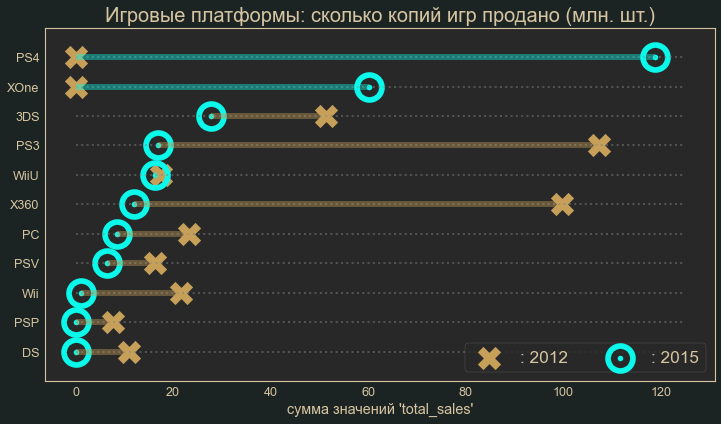

In [33]:
m.dumbbell_chart(df, 'platform', 'total_sales', 'year_of_release', 
               before = 2012, after = 2015, func = 'sum', drop_zero = True,
               title = 'Игровые платформы: сколько копий игр продано (млн. шт.)')

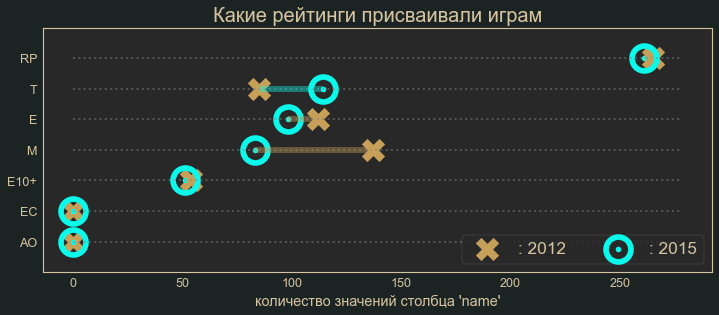

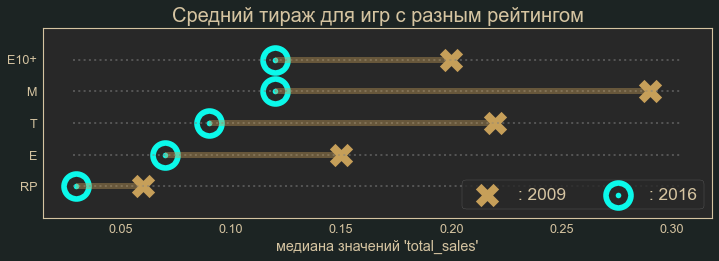

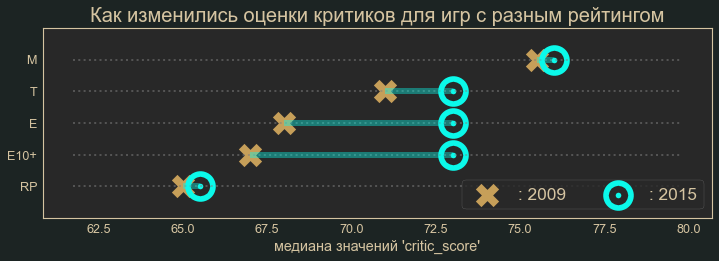

In [34]:
m.dumbbell_chart(df, 'rating', 'name', 'year_of_release', 
               before = 2012, after = 2015, func = 'count',
               title = 'Какие рейтинги присваивали играм')
print()
m.dumbbell_chart(df, 'rating', 'total_sales', 'year_of_release', 
               before = 2009, after = 2016, func = 'median', dropna = True,
               title = 'Средний тираж для игр с разным рейтингом')
print()
m.dumbbell_chart(df, 'rating', 'critic_score', 'year_of_release', 
               before = 2009, after = 2015, func = 'median', dropna = True,
               title = 'Как изменились оценки критиков для игр с разным рейтингом')

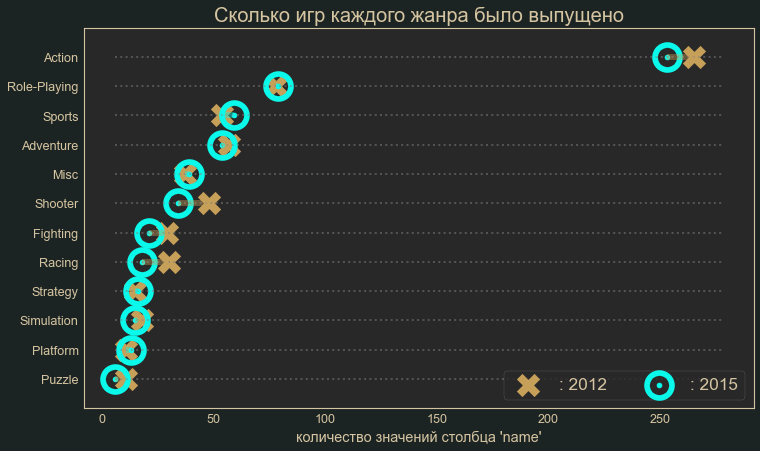

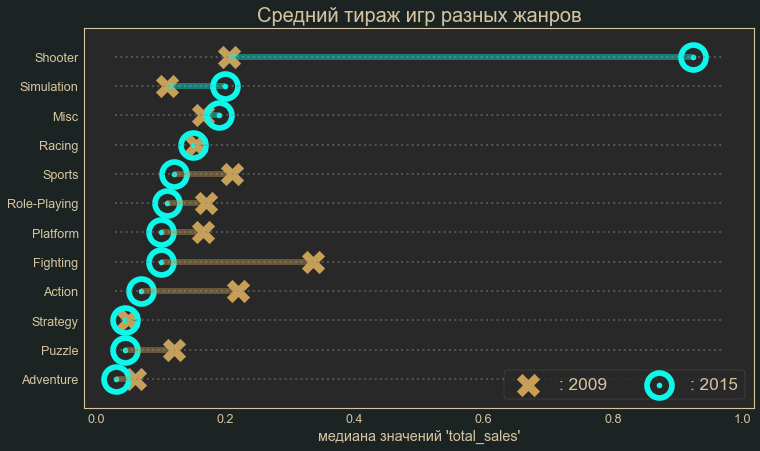

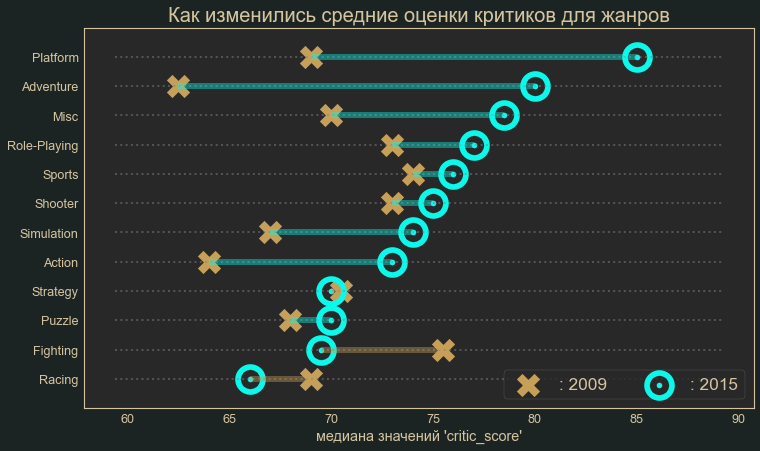

In [35]:
m.dumbbell_chart(df, 'genre', 'name', 'year_of_release', 
               before = 2012, after = 2015, func = 'count', drop_zero = True,
               title = 'Сколько игр каждого жанра было выпущено')
print()
m.dumbbell_chart(df, 'genre', 'total_sales', 'year_of_release', 
               before = 2009, after = 2015, func = 'median', drop_zero = True,
               title = 'Средний тираж игр разных жанров')
print()
m.dumbbell_chart(df, 'genre', 'critic_score', 'year_of_release', 
               before = 2009, after = 2015, func = 'median',
               title = 'Как изменились средние оценки критиков для жанров')

Актуальность игровой платформы я решил оценивать по числу проданный копий и по числу выпущенных на ней игр. Медиана и среднее показали бы, на какого размера аудиторию можно рассчитывать, выпуская игру на платформе, но, с другой стороны, усредннёные показатели множества выпускаемых на платформе игр мало о чём говорят - скорее их самих следовало бы подвергнуть анализу. 

- Есть вопросы к выборке игр - как получается, что игр для персонального компьютера выходит в шесть раз меньше, чем для других платформ?

Итак, вот значимые события на рынке компьютерных игр с 2011 по 2015 год. Нужно уточнить, в каком году эти события начали происходить, и выбрать тот, от которого отсчитывать актуальный период:
- год, когда PS4 и XOne стали захватывать рынок, а X360, PS3 и Wii сдавать позиции
- год, когда началось резкое падение кол-ва выпущенных игр и продаж жанра Misc, кол-во продаж жанра Action, а среднее кол-во продаж игр жанра Shooter значительно увеличилось.
- год, когда игры с рейтингом M (mature) начали значительно терять в средних продажах 
- год когда оценки критиков начали расти для почти всех жанров, а средние продажи падать

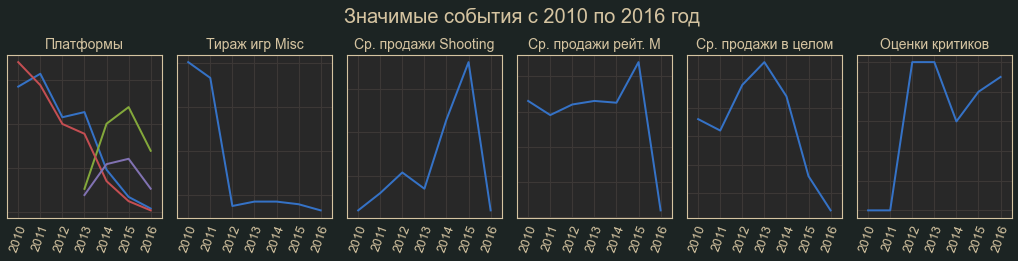

In [36]:
years = df[ df['year_of_release'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016]) ]
act_platforms_changed = (years[ years['platform'].isin(['PS3', 'X360', 'XOne', 'PS4']) ]
             .pivot_table(columns = 'platform', 
                          index = 'year_of_release', 
                          aggfunc = {'total_sales': 'sum'}))
misc_games_decrease = years[ years['genre'] == 'Misc' ].groupby('year_of_release').agg({'name': 'count'})
shooters_sales_increase = (years[ years['genre'] == 'Shooter' ]
                          .groupby('year_of_release').agg({'total_sales': 'median'}))
m_rating_decrease = years[ years['rating'] == 'M' ].groupby('year_of_release').agg({'total_sales': 'median'})
median_sales_decrease = years.groupby('year_of_release').agg({'total_sales': 'median'})
critic_score_increase = years.groupby('year_of_release').agg({'critic_score': 'median'})

titles = ['Платформы', 'Тираж игр Misc', 'Ср. продажи Shooting', 
          'Ср. продажи рейт. M', 'Ср. продажи в целом', 'Оценки критиков']

fig = plt.figure(figsize = (18, 3))
grid = fig.add_gridspec(1, 6, wspace = 0.1)
fig.suptitle("Значимые события с 2010 по 2016 год", fontsize = 20, y = 1.1, x = 0.522)
[fig.add_subplot(grid[0, i]) for i in range(6)]
for ax, pivot, title in zip(fig.axes, [act_platforms_changed, misc_games_decrease, shooters_sales_increase, 
                                       m_rating_decrease, median_sales_decrease, critic_score_increase], titles):
    ax.tick_params(labelleft = False)
    ax.set(xlim = (2009.5, 2016.5), xticks = np.arange(2010, 2017))
    ax.set_xticklabels(np.arange(2010, 2017), rotation = 70)
    ax.set_title(title, fontsize = 14)
    ax.plot(pivot, linewidth = 2)

Продажи Shooting и M - слишком неустойчивый тренд, всего по одному-двум годам, притом в 2016 продажи Shooting вернулись к прежним показателям. Упавший тираж игр жанра Misc - любопытно, но в масштабах рынка, наверное, незначительно. Остаётся выбирать из оставшихся графиков. По графику для 'total_sales' мы видели, что с 2013 года начинается новый виток в падении продаж. Здесь (по пятому графику) наблюдаем такой же тренд для показателя средних продаж с 2013 года, и, сильнее - с 2014 года. Между 2013 и 2014 годом игровые платформы нового поколения обогнали платформы старого поколения по количеству проданных игр. И, похоже, что это - наиболее значимые события с 2009 года. Поэтому если текущее состояние рынка компьютерных игр нужно заключить в исторические рамки, основываясь на этих данных, то наиболее обоснованно было бы
начать отсчёт с 2013 года. 

In [5]:
actual_period = df.query('year_of_release >= 2013')

## Жанры: по регионам и по продажам
<a id='target4'></a>

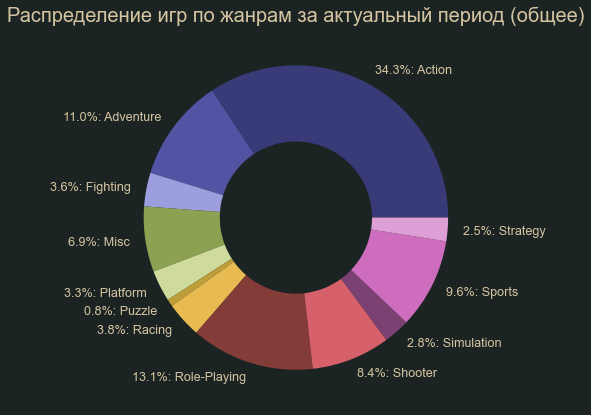

In [38]:
m.pie_chart(actual_period, 'genre', dec = 1, title = 'Распределение игр по жанрам за актуальный период (общее)')

In [39]:
colormap = { 'Puzzle': 'sandybrown',
             'Racing': 'chocolate',
             'Platform': 'black',
             'Strategy': 'yellow',
             'Simulation': 'violet',
             'Fighting': 'seagreen',
             'Sports': 'lightskyblue',
             'Misc': 'greenyellow',
             'Shooter': 'orange',
             'Adventure': 'red',
             'Role-Playing': 'royalblue',
             'Action': 'darkgrey' }

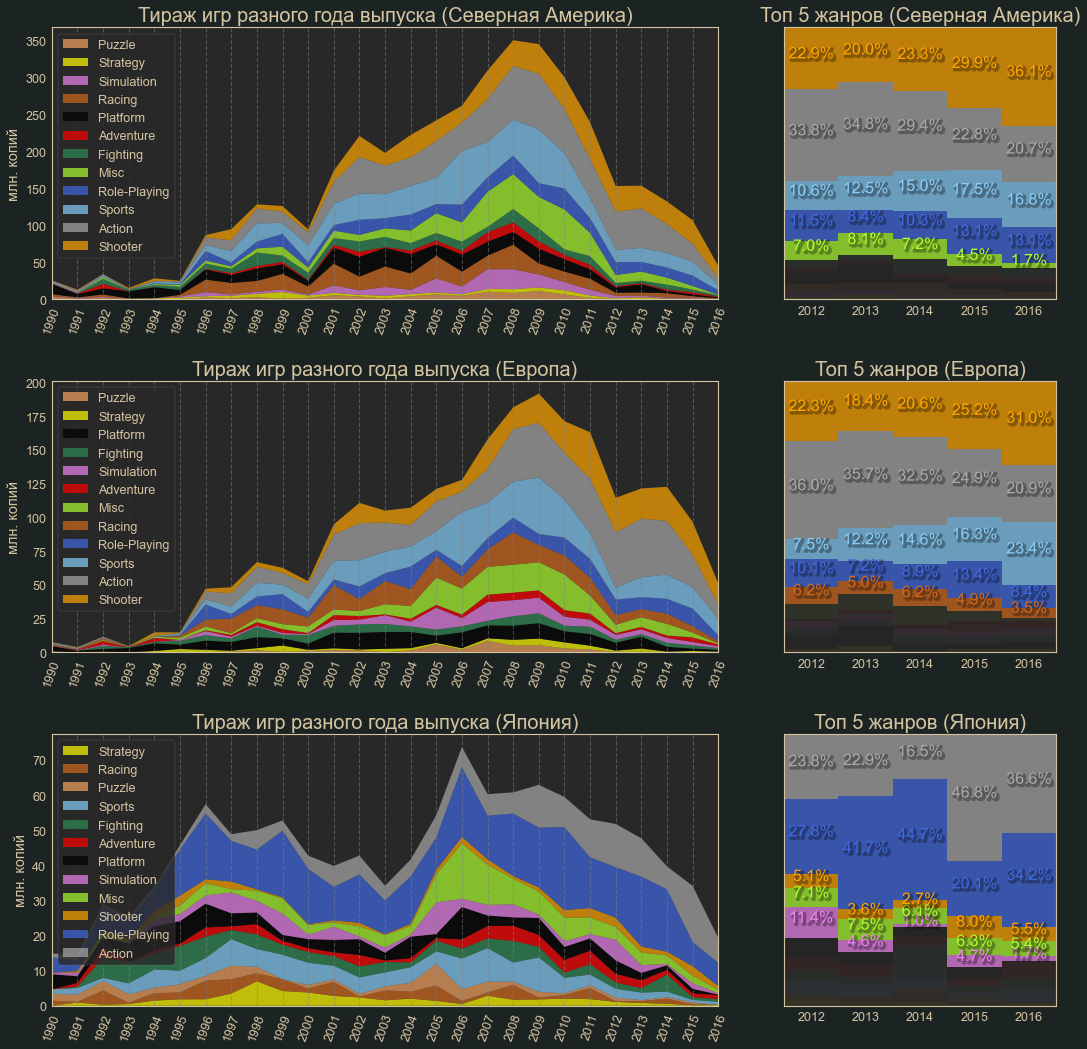

In [40]:
x = np.arange(1980, 2017)
frames_dic = {}
dic = { 'na_sales': '(Северная Америка)',
        'eu_sales': '(Европа)',
        'jp_sales': '(Япония)' }

for genre in df['genre'].cat.categories.to_list():
    frames_dic[genre] = (pd.pivot_table(df.query('genre == @genre'), 
                                        index = 'year_of_release', 
                                        aggfunc = {'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})
                           .reindex(x, fill_value = 0))
    
fig = plt.figure(figsize = (18, 18))
grid = fig.add_gridspec(3, 18, wspace = 0.2, hspace = 0.3)
ax_left = [fig.add_subplot(grid[i, :12]) for i in range(3)]
ax_right = [fig.add_subplot(grid[i, 13:]) for i in range(3)]

for ax, ax2, region in zip(ax_left, ax_right, dic):
    genres_ordered = (df.loc[ df['year_of_release'] == 2015 ]
                        .groupby('genre').agg({region: 'sum'})
                        .sort_values(by = region).index.to_list())
    colorlist = pd.Series(genres_ordered).map(colormap).to_list()
    y_stacked = []
    
    for key in genres_ordered:
        y_stacked.append(frames_dic[key].loc[:, region].to_list())

    ax.stackplot(x, y_stacked, labels = genres_ordered, colors = colorlist, alpha = 0.7)
    ax.set_title('Тираж игр разного года выпуска ' + dic[region], fontsize = 20)
    ax.grid(b = False, axis = 'y')
    ax.grid(axis = 'x', color = 'grey', linestyle = '--', alpha = 0.5)
    ax.set(xlim = (1990, 2016), xticks = np.arange(1990, 2017), ylabel = 'млн. копий')#, facecolor = 'white')
    ax.set_xticklabels(ax.get_xticks(), rotation = 70)
    ax.legend(loc = 'upper left')
    
    slice_for_sec_ax = pd.DataFrame(y_stacked).iloc[:, -5:]
    for i, year in enumerate([2012, 2013, 2014, 2015, 2016]):
        copies_sold = slice_for_sec_ax.iloc[:, i].sum()
        slice_for_a_bar = slice_for_sec_ax.iloc[:, i].div(copies_sold)
        ax2.bar(year, slice_for_a_bar[0], color = colorlist[0], alpha = 0.05, width = 1)
        for j, y in enumerate(slice_for_a_bar[1:], 1):
            if j < len(slice_for_a_bar) - 5:
                ax2.bar(year, y, bottom = slice_for_a_bar[:j].cumsum().iloc[-1], 
                        width = 1, color = colorlist[j], alpha = 0.05)
            else:
                bottom = slice_for_a_bar[:j].cumsum().iloc[-1]
                ax2.bar(year, y, bottom = bottom, color = colorlist[j], width = 1, alpha = 0.7)
                ax2.text(year, ((y + bottom + bottom) / 2 ), "{:.1%}".format(y), size = 16, color = colorlist[j],
                         path_effects = [path_effects.SimpleLineShadow(linewidth = 3, foreground = 'black'), 
                                 path_effects.Normal()], ha = 'center')
    ax2.set(ylim = (0, 1), xlim = (2011.5, 2016.5), yticks = [])
    ax2.set_title('Топ 5 жанров ' + dic[region], fontsize = 20)
    ax2.grid(b = False, axis = 'both')

Есть глобальные и региональные особенности в жанрах. Из глобальных, например, глобальный рост с 2004 года продаж игр жанра Misc, и глобальное падение к 2012 году. Из региональных, например, преходящая популярность на игры жанра Sports в Европе: доля продаж этого жанра именно в Европе колеблется так сильно, как ни в каком другом регионе. В том числе видим резкий рост продаж этого жанра в Европе с 7% до 23% к 2016 году, из чего следует, что, вероятно, за ростом популярности в последующие годы непременно последует падение. А в Японии жанр Sports совершенно не востребован в последние годы, и по популярности занимает 4ое место с конца. Зато если выпускается игра жанра Role-Playing, то можно рассчитывать на повышенный интерес к ней именно в Японии, а если игра жанра Shooter - то в Европе и Северной Америке. Доля игр жанра Shooter в Европе и в Америке с 2013 года неуклонно растёт, в то время как доля Action в той же пропорции неуклонно падает. И так далее.

Задача - найти специфику жанров в том, как они продаются. Вывести медиану для каждого жанра - одно из решений, но не такое информативное, как построить боксплоты. Делая это, учитываем данные за актуальный период, не искажая их теми данными, выводы из которых могут быть неактуальны для настоящего времени.

In [78]:
def boxplot_sequence(df, Y_column, X_column, categories = [], title = '', x_dec = 1):
    """
    Строит боксплоты для нескольких категорий. Первый аргумент - датафрейм, второй - столбец с
    категориями (ось У), третий - столбец с изучаемой переменной (ось Х). Далее параметры: 
    `categories = ` принимает коллекцию категорий, для которых будут построены боксплоты, по 
    умолчанию - строит для всех. 'title = ' принимает строчку с заголовком, 'x_dec = ' 
    принимает количество цифр после запятой на отметках оси X. Выбросы не рисуются. Вместо этого при
    наличии выбросов указывается процент - доля выбросов от всех значений переменной внутри категории.
    Точка обозначает среднее. Если точка пурпурного цвета, значит, среднее вышло за 1.5 iqr. 
    """
    if 'plt' not in dir():
        import matplotlib.pyplot as plt
    if 'pd' not in dir():
        import pandas as pd
    if 'np' not in dir():
        import numpy as np
    if 'display' not in dir():
        from IPython.display import display
        
    if hasattr(df[Y_column], 'cat'):
        df = df.copy()
        df[Y_column] = df[Y_column].astype('object')
        # понадобится сделать группировку, из которой нужно 
        # исключить все невостребованные категории

    if len(categories) == 0:
        categories = list(df[Y_column].dropna().unique())
    else:
        categories = list(categories)
    
    categories = (df[ df[Y_column].isin(categories) ].groupby(Y_column)[X_column].median()
                                                     .sort_values().index.to_list())
    leng = len(categories)
    thr_s = []
    
    fig, ax = plt.subplots(figsize = (12, leng * 0.8))
    ax.set_title(title, fontsize = 20, y = 1.03)
    ax.grid(b = False, axis = 'y')
    ax.grid(axis = 'x', alpha = 0.2, color = 'grey', zorder = 1)
    
    bps = ax.boxplot([df.loc[ df[Y_column] == cat, X_column ] for cat in categories], zorder = 2,
                     showfliers = False, vert = False, patch_artist = True)
    xlim_min, xlim_max = ax.get_xlim()
    ylim = ax.get_ylim()
    yticks = ax.get_yticks()
    ax.set(ylim = (ylim[0] - 0.4, ylim[1] + 0.4), yticks = yticks, 
           yticklabels = categories, xlabel = X_column)
    for whiskers in bps['whiskers']:
        whiskers = whiskers.set(color = '#dfc5fe', linewidth = 3)
    for caps in bps['caps']:
        caps = caps.set(color = '#856798', linewidth = 4)
    for medians in bps['medians']:
        medians = medians.set(color = '#fdff38', linewidth = 3)
    for boxes in bps['boxes']:
        boxes = boxes.set(facecolor = '#856798')
        
    for y, cat in zip(yticks, categories):
        sliced = df.loc[ (df[Y_column] == cat), X_column]
        sl_leng = sliced.shape[0]
        Q3 = sliced.quantile(0.75)
        Q1 = sliced.quantile(0.25)
        iq_range = Q3 - Q1
        top_threshold = Q3 + (iq_range * 1.5)
        bot_threshold = Q1 - (iq_range * 1.5)
        if top_threshold > sliced.max():
            top_threshold = sliced.max()
        if bot_threshold < sliced.min():
            bot_threshold = sliced.min()
        
        shift_magn = (xlim_max - xlim_min) * 0.02
        
        outl_top_leng = sliced[ sliced > top_threshold ].shape[0]
        outl_bot_leng = sliced[ sliced < bot_threshold ].shape[0]
        
        closest_to_top = sliced[ sliced < top_threshold ].max()
        closest_to_bot = sliced[ sliced > bot_threshold ].min()
        thr_s.append(closest_to_top)
        thr_s.append(closest_to_bot)
        
        mean = sliced.mean()
        color = '#dfc5fe'
        if mean > top_threshold:
            mean = closest_to_top
            color = '#c20078'
        elif mean < bot_threshold:
            mean = closest_to_bot
            color = '#c20078'
            
        ax.scatter(y = y, x = mean, c = color, s = 70, zorder = 3)
        
        for out_number, if_bot in zip([outl_bot_leng, outl_top_leng], [True, False]):
            if out_number > 0:
                inscr = '{:.2%}'.format(out_number / sl_leng)
                
                if if_bot:
                    loc = closest_to_bot - shift_magn
                    ax.text(loc, y, inscr, color = '#dfc5fe', fontsize = 13.5, va = 'center', ha = 'right')
                    if (loc - xlim_min) < ((xlim_max - xlim_min) * 0.07):
                        xlim_min = xlim_min - ((xlim_max - xlim_min) * 0.07)
                        ax.set_xlim(xmin = xlim_min)
                else:
                    loc = closest_to_top + shift_magn
                    ax.text(loc, y, inscr, color = '#dfc5fe', fontsize = 13.5, va = 'center', ha = 'left')
                    if (xlim_max - loc) < ((xlim_max - xlim_min) * 0.08):
                        xlim_max = xlim_max + ((xlim_max - xlim_min) * 0.08)
                        ax.set_xlim(xmax = xlim_max)
                        
    x_ticks = np.linspace(min(thr_s), max(thr_s), 13)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([round(x, x_dec) if (x_dec != 0) else int(round(x, x_dec)) for x in x_ticks], rotation = 70)

    display(fig)
    plt.close(fig)

In [80]:
df.query('rating == "K-A"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A,2.40
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A,1.91
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A,0.01


In [74]:
df.loc[1426, 'total_sales'] = 900000

[0.01, 0.04, 1.17, 0.02, 1.2, 0.02, 1.07, 0.02, 0.37, 0.05, 2.08, 0.02, 1.91, 1.91, nan, nan]


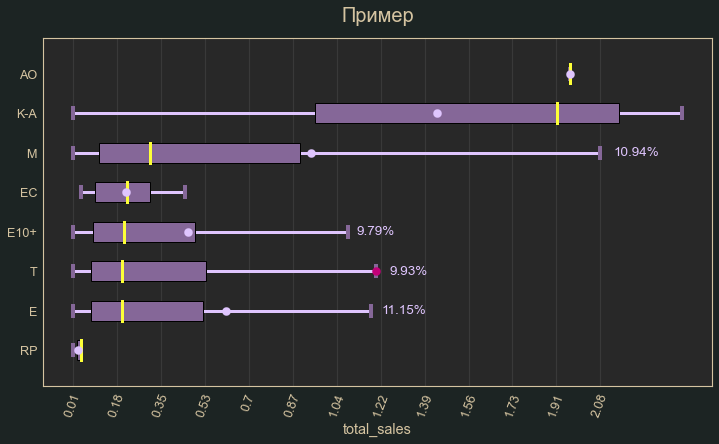

In [79]:
top_platf = ['PS4', 'XOne', '3DS', 'PS3', 'WiiU', 'PS2']
boxplot_sequence(df, 'rating', 'total_sales', x_dec = 2, title = 'Пример')

In [77]:
df[ df['rating'] == 'AO' ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO,1.96


In [52]:
m.dumbbell_chart??

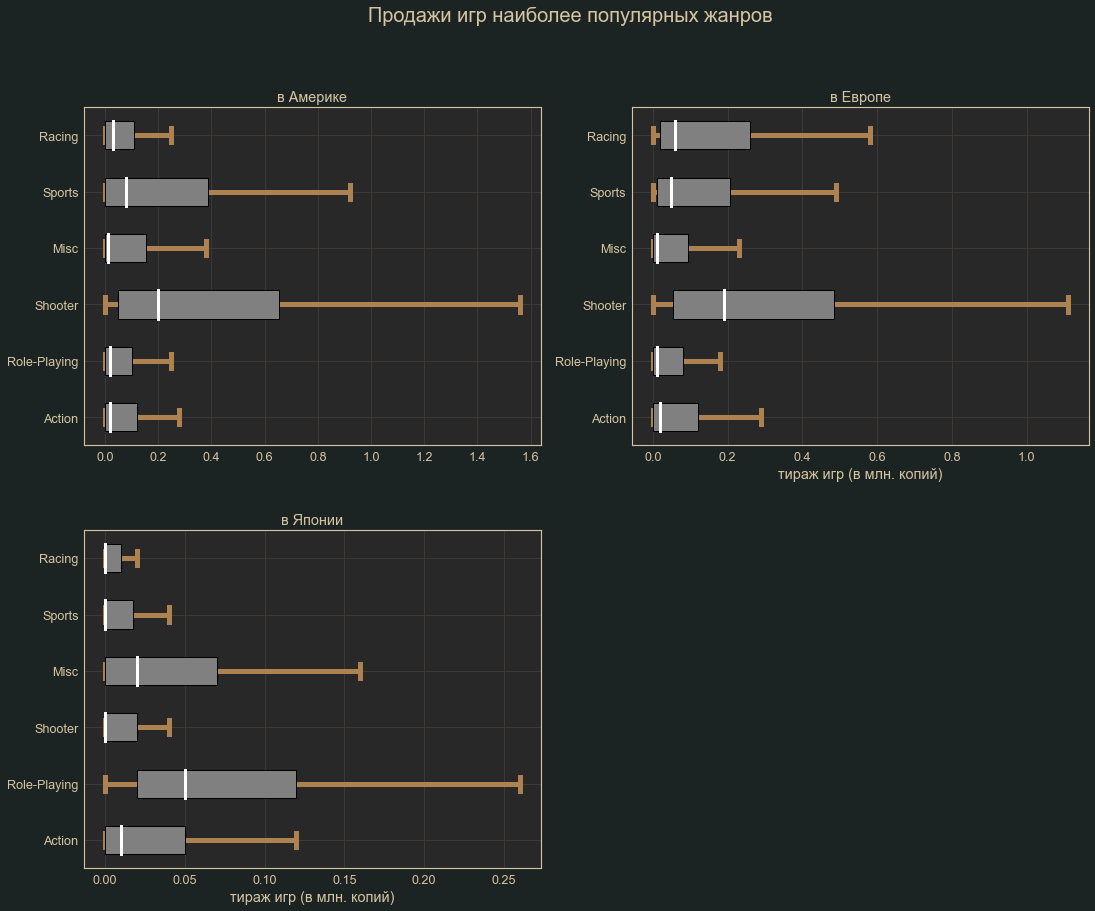

In [43]:
fig = plt.figure(figsize = (18, 14))
grid = fig.add_gridspec(2, 2, wspace = 0.2, hspace = 0.25)
fig.add_subplot(grid[0, 0]); fig.add_subplot(grid[0, 1]); fig.add_subplot(grid[1, 0])
top_genres = ['Action', 'Role-Playing', 'Shooter', 'Misc', 'Sports', 'Racing']
fig.suptitle('Продажи игр наиболее популярных жанров', fontsize = 20, y = 0.98)

for ax, reg, title in zip(fig.axes, ['na_sales', 'eu_sales', 'jp_sales'], ['в Америке', 'в Европе', 'в Японии']):
    bps = ax.boxplot([actual_period.loc[ actual_period['genre'] == ge, reg ] for ge in top_genres], 
                     showfliers = False, vert = False, patch_artist = True)
    ax.set(yticklabels = top_genres, title = title,
           xlabel = ['тираж игр (в млн. копий)' if title != 'в Америке' else ''][0])
    for whiskers in bps['whiskers']:
        whiskers = whiskers.set(color = '#ad8150', linewidth = 5)
    for caps in bps['caps']:
        caps = caps.set(color = '#ad8150', linewidth = 5)
    for medians in bps['medians']:
        medians = medians.set(color = 'white', linewidth = 3)
    for boxes in bps['boxes']:
        boxes = boxes.set(facecolor = 'grey')
        

display(fig)
plt.close(fig)

Усы всех боксплотов пропорциональны размерам коробок, что говорит о равномерном распределении продаж. Медиана в большей или меньшей степени смещена влево, чем сильнее - тем больше вероятность, что игра данного жанра не будет иметь никакого коммерческого успеха. Коммерчески перспективные жанры, как видно из сопоставления с предыдущим графиком, это не всегда наиболее популярные жанры: к примеру, жанр Action, занимающий в Японии первое место по популярности, стоит лишь на третьем месте по продажам - медиана чрезвычайно смещена к нулю, а полтора межквартильных размаха заканчиваются на том значении, где только кончается 75 квантиль продаж игр жанра Role-Playing. Почему популярность не совпадает с прибыльностью, можно объяснить, вспомнив один из "гантельных" графиков из предыдущего раздела - в 2016 году игр жанра Action было выпущено больше в два с половиной раза, чем игр ближайшего жанра-"преследователя". Ещё можно отметить исключительную любовь европейцев к жанру Racing - и по продажам, и по популярности. Ожидаемая прибыль от игры этого жанра, если она выпускается в Европе, уступает по своей величине только играм жанра Shooting.

Средний тираж игр разного жанра, как видно, отличается. А как обстоит дело со средней пользовательской оценкой для игр разных жанров? Чтобы провести ttsest и ответить на вопрос, оценим std генеральных совокупностей.

In [44]:
first = actual_period.loc[ actual_period['genre'] == 'Action', 'user_score' ].dropna()
second = actual_period.loc[ actual_period['genre'] == 'Sports', 'user_score' ].dropna()

m.std_ddof([first, second])

13.302 17.834 
Дисперсии (176.94 и 318.06) отличаются более чем на 5%


Разница существенная, поэтому в тесте стоит указать параметр `equal_var = False`. У переменной с ограниченным диапазоном значений ('user_score' - от 0 до 100) не может быть выбросов (ttest так же неустойчив к выбросам), поэтому усекать выборку не нужно.

In [45]:
result = st.ttest_ind(first, second, equal_var = False)
print("Существуют две ген.совокупности: все пользовательские оценки 'Action' & все\nпользовательские оценки 'Sports' (за актуальный период)", end = '\n\n')
print("H0: Средние ген.совокупностей равны, H1: средние ген.совокупностей НЕ равны")
print('Вероятность наших выборок при допущении H0:', str(round(result.pvalue * 100, 3)) + '%')
[print('\t- Отклоняем H0') if result.pvalue < 0.05 else print('\t- Допускаем H0')];

Существуют две ген.совокупности: все пользовательские оценки 'Action' & все
пользовательские оценки 'Sports' (за актуальный период)

H0: Средние ген.совокупностей равны, H1: средние ген.совокупностей НЕ равны
Вероятность наших выборок при допущении H0: 0.0%
	- Отклоняем H0


Жанр игры на данный момент влияет на пользовательские оценки. Мы провели тест для жанров 'Action' и 'Sports' - двух жанров, для которых в датасете достаточно наблюдений. Нет поводов думать, что для других жанров в актуальном периоде картина была бы иной. А была ли она в исторической перспективе иной? Проведём тот же тест над выборками, сделанными по тому же принципу, но не за актуальный период, а за всё время наблюдений.

In [46]:
first = df.loc[ df['genre'] == 'Action', 'user_score' ].dropna()
second = df.loc[ df['genre'] == 'Sports', 'user_score' ].dropna()

result = st.ttest_ind(first, second, equal_var = False)
print("Существуют две ген.совокупности: все пользовательские оценки 'Action' & все\nпользовательские оценки 'Sports' (за всё время)", end = '\n\n')
print("H0: Средние ген.совокупностей равны")
print('Вероятность наших выборок при допущении H0:', str(round(result.pvalue * 100, 3)) + '%')
[print('\t- Отклоняем H0') if result.pvalue < 0.05 else print('\t- Допускаем H0')];

Существуют две ген.совокупности: все пользовательские оценки 'Action' & все
пользовательские оценки 'Sports' (за всё время)

H0: Средние ген.совокупностей равны
Вероятность наших выборок при допущении H0: 41.417%
	- Допускаем H0


Выходит, именно сейчас игры жанра Sports и Action оцениваются игроками по-разному, тогда как в исторической перспективе оценки как минимум сопоставимы. Это говорит о том, что различие выборочных средних исторически неустойчиво, и при прогнозировании оценок для новых игр не стоит слишком полагаться на жанр. Но если полагаться, то на более благосклонный приём стоит рассчитывать...

In [47]:
print(f"В актуальном периоде средняя оценка 'Action': {round(actual_period.loc[ actual_period['genre'] == 'Action', 'user_score' ].mean(), 1)}, а 'Sports': {round(actual_period.loc[ actual_period['genre'] == 'Sports', 'user_score' ].mean(), 1)}")

В актуальном периоде средняя оценка 'Action': 68.4, а 'Sports': 52.4


... если жанр игры - 'Action'. А вот таблица со средней пользовательской оценкой для всех жанров:

In [48]:
actual_period.groupby('genre')['user_score'].mean().dropna().apply(lambda x: round(x,1)).sort_values()

genre
Sports          52.4
Simulation      60.5
Racing          60.8
Strategy        61.8
Shooter         63.4
Platform        67.1
Action          68.4
Misc            69.8
Fighting        70.4
Role-Playing    73.8
Adventure       74.6
Puzzle          74.7
Name: user_score, dtype: float64

Любопытно, что самая высокая пользовательская оценка у самого непопулярного жанра - 'Puzzle'. В следующем разделе исследуем этот феномен чуть подробнее.

## Оценки критиков и игроков
<a id='target5'></a>

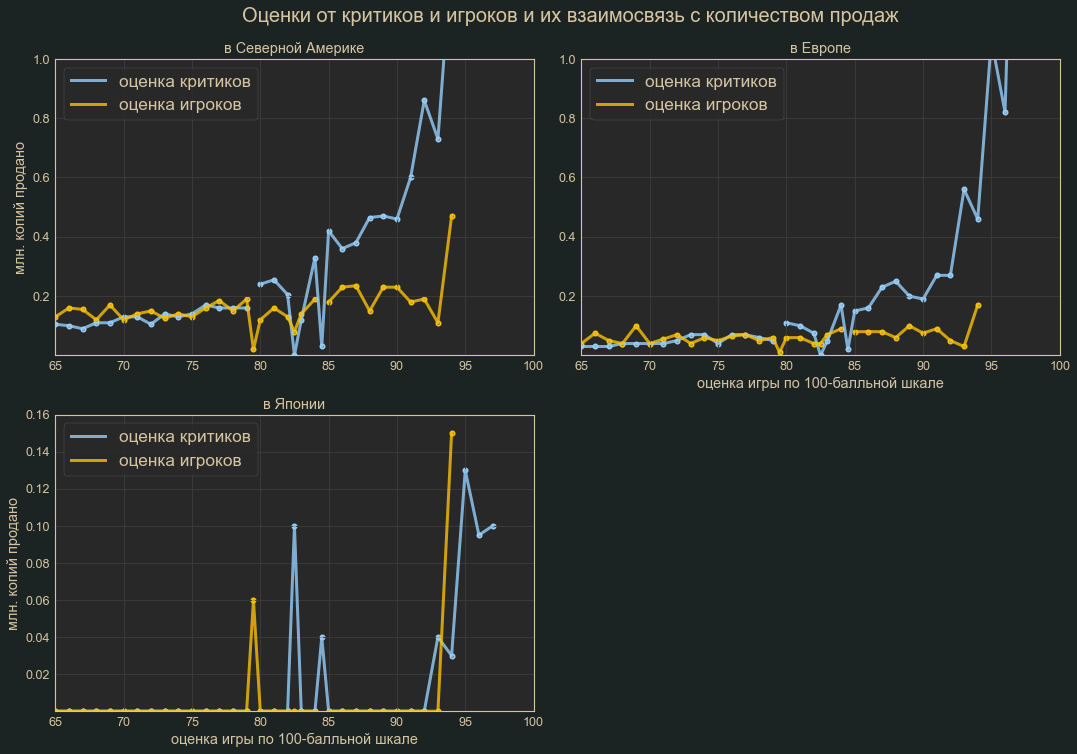

In [49]:
fig = plt.figure(figsize = (18, 12))
grid = fig.add_gridspec(2, 2, wspace = 0.1, hspace = 0.2)
ax = (fig.add_subplot(grid[0, 0]), fig.add_subplot(grid[0, 1]), fig.add_subplot(grid[1, 0]))
fig.suptitle("Оценки от критиков и игроков и их взаимосвязь с количеством продаж", 
             fontsize = 20, y = 0.94, x = 0.522)
counter = 0
dic = { 'na_sales': ['в Северной Америке', False],
        'eu_sales': ['в Европе', False],
        'jp_sales': ['в Японии', True]  }

for ax, region in zip(ax, dic):
    
    cs_medians = df.groupby('critic_score').agg({region: ['median', 'count']})
    cs_medians.drop(cs_medians[ cs_medians[(region, 'count')] <= 10 ].index, axis = 0, inplace = True)                                            
    us_medians = df.groupby('user_score').agg({region: ['median', 'count']}).iloc[:-1] # iloc[:-1] - to exclude 'tbd'
    us_medians.drop(us_medians[ us_medians[(region, 'count')] <= 10 ].index, axis = 0, inplace = True)
    medians = pd.concat([cs_medians, us_medians], axis = 1)
    medians.columns = ['cs_median', '', 'us_median', '']
                                            
    ax.plot(medians.index, medians['cs_median'], color = '#95d0fc', alpha = 0.8, 
                linewidth = 3, label = 'оценка критиков')
    ax.scatter(medians.index, medians['cs_median'], s = 20, linewidths = 1.5, 
                   c = 'grey', edgecolors = '#95d0fc')
    ax.plot(medians.index, medians['us_median'], color = '#fac205', alpha = 0.8, 
                linewidth = 3, label = 'оценка игроков')
    ax.scatter(medians.index, medians['us_median'], s = 20, linewidths = 1.5, 
                   c = 'grey', edgecolors = '#fac205')

    if dic[region][1]:
        ax.set(ylim = (0, 0.16), xlim = (65, 100), ylabel = ['млн. копий продано' if counter in [0, 2] else ''][0],
           title = dic[region][0], xlabel = ['оценка игры по 100-балльной шкале' if counter in [1, 2] else ''][0])
    else:
        ax.set(ylim = (0, 1), xlim = (65, 100), ylabel = ['млн. копий продано' if counter in [0, 2] else ''][0],
           title = dic[region][0], xlabel = ['оценка игры по 100-балльной шкале' if counter in [1, 2] else ''][0])
    ax.legend(fontsize = 'xx-large')
    ax.set_yticks(ax.get_yticks()[1:])
    counter += 1

display(fig)
plt.close(fig)

Можно было предположить, что оценки критиков имеют мало общего с коммерческой успешностью продукта. Об их коллегах из областей искусства есть стереотип, дескать, они предпочитают непопулярные и камерные произведения. Как бы то ни было с искусством, а в игровой индустрии получается наоборот. Непопулярным и камерным играм ограниченное число их фанатов создаёт высокий пользовательский рейтинг. В итоге, кривая пользовательских оценок очень слабо коррелирует с количеством проданных копий в Северной Америке, и совершенно не коррелирует в Европе. Оценки критиков более совпадают с рыночной оценкой игры, особенно в Северной Америке. В Европе для предсказания коммерческой успешности игры можно обращать внимание на оценки критиков, если они ваше 80 пунктов. 
   
Что до Японии, складывается впечатление, что там 
- либо там играют только в те игры, которые оцениваются по максимальной шкале и игроками, и критиками(то что кривая обрывается, не дойдя до ста, означает, что у нас меньше десяти наблюдений для больших оценок, а не то, что их не бывает),
- либо массовый вкус никто не оспаривает и не подвергает сомнению, поэтому любая популярная игра всеми единогласно высоко оценивается.
- либо, если пики между 79 и 85 не случайны, на рейтинг вообще не обращают внимания, и любая игра независимо от рейтинга может набрать приличные продажи.

Не хватает понимания, в каком соотношениии распределены 
оценки пользователей и критиков в регионах, особенно в Японии. Чтобы недостаток устранить, нужны гистограммы. В датасете игры не разделены на японские, европейские и американские, но мы можем рассуждать по принципу, что та игра, которая в Японии продаётся больше, чем в Европе и Америке, скорее всего, является японской.
  
От распределения оценок в Японии ожидаем пика на отметке 92 и выше и короткие "хвосты". 

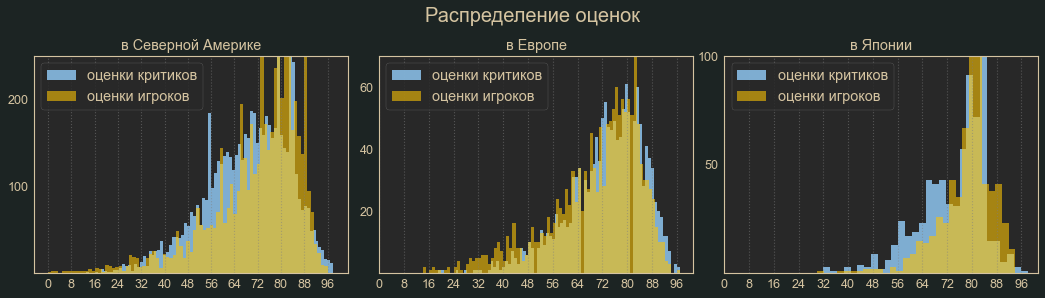

In [50]:
fig = plt.figure(figsize = (18, 4))
grid = fig.add_gridspec(1, 3, wspace = 0.1)
fig.suptitle("Распределение оценок", fontsize = 20, y = 1.05, x = 0.51)
regions = {'na_sales': 'в Северной Америке', 
           'eu_sales': 'в Европе', 
           'jp_sales': 'в Японии'}

for i, region in enumerate(regions):
    if region == 'na_sales':
        ylim = (0, 250)
        number_of_bins = 83
    elif region == 'eu_sales':
        ylim = (0, 70)
        number_of_bins = 83
    else:
        ylim = (0, 100)
        number_of_bins = 30

    other_regions = list(regions.keys()).copy()
    other_regions.remove(region)
    
    ax = fig.add_subplot(grid[0, i])
    ax.hist(df.loc[ ((df[region] > df[other_regions[0]]) & (df[region] > df[other_regions[1]])), 'critic_score'], 
            bins = number_of_bins, color = '#95d0fc', alpha = 0.8, label = 'оценки критиков')
    ax.hist(df.loc[ ((df[region] > df[other_regions[0]]) & 
                     (df[region] > df[other_regions[1]])), 'user_score'], 
            bins = number_of_bins, color = '#fac205', alpha = 0.6, label = 'оценки игроков')
    ax.set(xticks = np.arange(0, 101, 8), title = regions[region], yticks = ax.get_yticks()[1:], ylim = ylim)
    ax.grid(b = False, axis = 'y')
    ax.grid(color = 'grey', linestyle = 'dotted', alpha = 0.5, axis = 'x')
    ax.legend(fontsize = 'x-large')

display(fig)
plt.close(fig)

В Северной Америке и Японии игроки благосклоннее к играм, чем в Европе: распределение смещено вправо (по сравнению с распределением оценок критиков), а несколько пиков начиная от оценки 70 "уравновешиваются" малым, почти отсутствующим количеством оценок ниже 50. В Европе у игроков и критиков единодушие, притом оценки ниже 50 игроки ставят чаще, чем критики.
  
В Японии, получается, распределение оценок такое же, как в других частях света. Но не может быть, чтобы оценки ставили одним играм, а играли в другие. Так же трудно поверить, что оценки ставят одни люди (критики и игроки не из Японии), а покупают игру другие (продажи в Японии). В любом случае, лучше искать другое объяснение вместо тех, что предложены выше.

In [51]:
df.loc[ df['critic_score'] < 90.0, 'jp_sales' ].describe()

count    8660.000000
mean        0.059258
std         0.282831
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max        10.220000
Name: jp_sales, dtype: float64

3 квартиль - ноль продаж в Японии. Иначе говоря, как минимум 3 из 4 игр, получившие от критиков меньше 90 баллов, никак не будут представлены на японском рынке компьютерных игр.  
  
А если ограничиться теми играми, которые предположительно были выпущены в Японии?

In [52]:
(df.loc[ ((df['jp_sales'] > df['eu_sales']) & 
          (df['jp_sales'] > df['na_sales']) & (df['critic_score'] < 90.0)), 'jp_sales' ].describe())

count    820.000000
mean       0.323476
std        0.464332
min        0.010000
25%        0.100000
50%        0.190000
75%        0.360000
max        5.330000
Name: jp_sales, dtype: float64

Совершенно другие цифры! Нарисуем кривую соотношения проданных копий с оценками ещё раз, специально для этих игр.

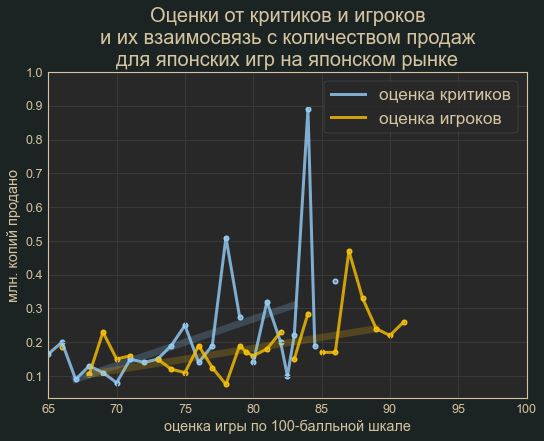

In [53]:
fig = plt.figure(figsize = (18, 6))
grid = fig.add_gridspec(1, 2, wspace = 0.1, hspace = 0.2)
ax = fig.add_subplot(grid[0, 0])
ax.set_title("Оценки от критиков и игроков\nи их взаимосвязь с количеством продаж\nдля японских игр на японском рынке", 
             fontsize = 20)

slice_jp = (df.loc[ ((df['jp_sales'] > df['eu_sales']) & 
           (df['jp_sales'] > df['na_sales']) & (df['critic_score'] < 90.0))])
cs_medians = slice_jp.groupby('critic_score').agg({'jp_sales': ['median', 'count']})
cs_medians.drop(cs_medians[ cs_medians[('jp_sales', 'count')] <= 7 ].index, axis = 0, inplace = True)                                            
us_medians = slice_jp.groupby('user_score').agg({'jp_sales': ['median', 'count']}).iloc[:-1] # iloc[:-1] - to exclude 'tbd'
us_medians.drop(us_medians[ us_medians[('jp_sales', 'count')] <= 7 ].index, axis = 0, inplace = True)
medians = pd.concat([cs_medians, us_medians], axis = 1)
medians.columns = ['cs_median', '', 'us_median', '']

ax.plot(medians.index, medians['cs_median'], color = '#95d0fc', alpha = 0.8, 
            linewidth = 3, label = 'оценка критиков')
ax.scatter(medians.index, medians['cs_median'], s = 20, linewidths = 1.5, 
               c = 'grey', edgecolors = '#95d0fc')
ax.plot(medians.index, medians['us_median'], color = '#fac205', alpha = 0.8, 
            linewidth = 3, label = 'оценка игроков')
ax.scatter(medians.index, medians['us_median'], s = 20, linewidths = 1.5, 
               c = 'grey', edgecolors = '#fac205')

ax.set(xlim = (65, 100), ylabel = 'млн. копий продано',
       xlabel = 'оценка игры по 100-балльной шкале')
ax.legend(fontsize = 'xx-large')
ax.set_yticks(ax.get_yticks()[1:])

ax.add_line(mlines.Line2D([67, 83], [0.09, 0.31], linewidth = 7, c = '#95d0fc', alpha = 0.2))
ax.add_line(mlines.Line2D([68, 89], [0.105, 0.24], linewidth = 7, c = '#fac205', alpha = 0.2))

display(fig)
plt.close(fig)

Теперь кривые стали похожими на те, что были построены для других регионов. Выводы:
- даже удостоившись высоких оценок от критиков, игра с большой вероятностью не окажется представлена на японском рынке, если не была создана в Японии. 
- для игр, созданных в Японии как оценки критиков, так и оценки игроков (но в меньшей степени!) являются хорошим индикатором того, будет ли игра коммерчески успешна (с продажами выше 100 тыс.копий). Корреляция выражена в такой же степени как и в других регионах: например, в промежутке между 67 и 83 баллами от критиков продажи игры в Японии равно как и в Северной Америке возрастают примерно в два с половиной раза: со ~100 тыс. копий до ~250 тыс.копий.

In [54]:
slice_jp = df[(df['jp_sales'] > df['eu_sales']) & (df['jp_sales'] > df['na_sales']) & (df['jp_sales'] > df['other_sales'])]
jp = slice_jp[ slice_jp['critic_score'] < 90.0 ]['jp_sales'].sum() / slice_jp[ slice_jp['critic_score'].notna() ]['jp_sales'].sum()
print('Доля игр предположительно японского производства на японском рынке: {:.0%}'.format(slice_jp['jp_sales'].sum() / df['jp_sales'].sum()))
print(f'Среди них доля на японском рынке тех, кто набрал менее 90 баллов от критиков равна {int(jp * 100)}%')

Доля игр предположительно японского производства на японском рынке: 64%
Среди них доля на японском рынке тех, кто набрал менее 90 баллов от критиков равна 93%


In [55]:
eu_na_slice = df[(df['eu_sales'] > df['jp_sales']) | (df['na_sales'] > df['jp_sales']) | (df['other_sales'] > df['jp_sales'])]
eu_na = eu_na_slice[ (eu_na_slice['critic_score'] < 90.0) ][['eu_sales', 'na_sales']].sum().sum() / eu_na_slice[ eu_na_slice['critic_score'].notna() ][['eu_sales', 'na_sales']].sum().sum()
print('Доля предположительно неяпонских игр в Европе и Америке: {:.0%}'.format(eu_na_slice[['eu_sales', 'na_sales', 'other_sales']].sum().sum() / df[['eu_sales', 'na_sales', 'other_sales']].sum().sum()))
print(f'Среди них доля тех, кто набрал менее 90 баллов от критиков равна {int(eu_na * 100)}%')

Доля предположительно неяпонских игр в Европе и Америке: 96%
Среди них доля тех, кто набрал менее 90 баллов от критиков равна 84%


Здесь мы подтвердили, что японский рынок закрытый и благоприятствует играм местного производства, даже если те не получили высокой оценки от критиков. 

In [56]:
for reg_col, reg in zip(['na_sales', 'eu_sales', 'jp_sales'], ['Северная Америка', 'Европа', 'Япония']):
    print(reg + ':')
    if reg != 'Япония':
        print('\tКорреляция продаж с оценками критиков: ', round(eu_na_slice['critic_score'].corr(eu_na_slice[reg_col], method = 'spearman'), 2))
        print('\tКорреляция продаж с оценками игроков: ', round(eu_na_slice.astype('object').loc[:, 'user_score' ].astype('float').corr(eu_na_slice.astype('object').loc[:, reg_col].astype('float'), method = 'spearman'), 2))
    else:
        print('\tКорреляция продаж с оценками критиков: ', round(slice_jp['critic_score'].corr(slice_jp[reg_col], method = 'spearman'), 2))
        print('\tКорреляция продаж с оценками игроков: ', round(slice_jp.astype('object').loc[:, 'user_score' ].astype('float').corr(slice_jp.astype('object').loc[:, reg_col].astype('float'), method = 'spearman'), 2))

Северная Америка:
	Корреляция продаж с оценками критиков:  0.32
	Корреляция продаж с оценками игроков:  0.14
Европа:
	Корреляция продаж с оценками критиков:  0.38
	Корреляция продаж с оценками игроков:  0.14
Япония:
	Корреляция продаж с оценками критиков:  0.2
	Корреляция продаж с оценками игроков:  0.19


## Пять самых популярных платформ на 2016 год
<a id='target6'></a>

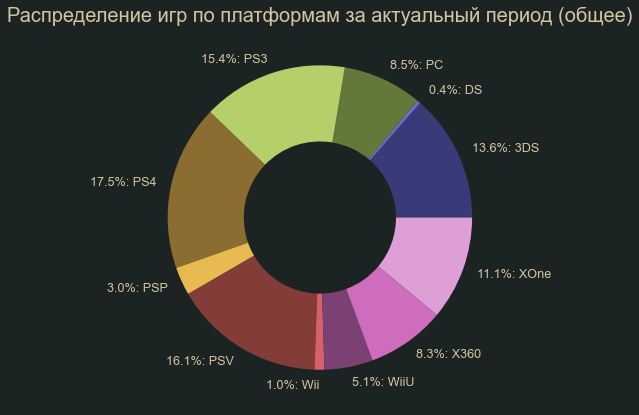

In [57]:
m.pie_chart(actual_period, 'platform', dec = 1, title = 'Распределение игр по платформам за актуальный период (общее)')

На круговой диаграмме - не продажи, а число выпущенных игр. При этомиз ранее построенных графиков известно, что 5 наиболее перспективных платформ на 2016 год (по продажам в абсолютных цифрах) немного другие - это PS4, PS3, XOne, 3DS и WiiU. Построим боксплоты для них (для актуального периода).

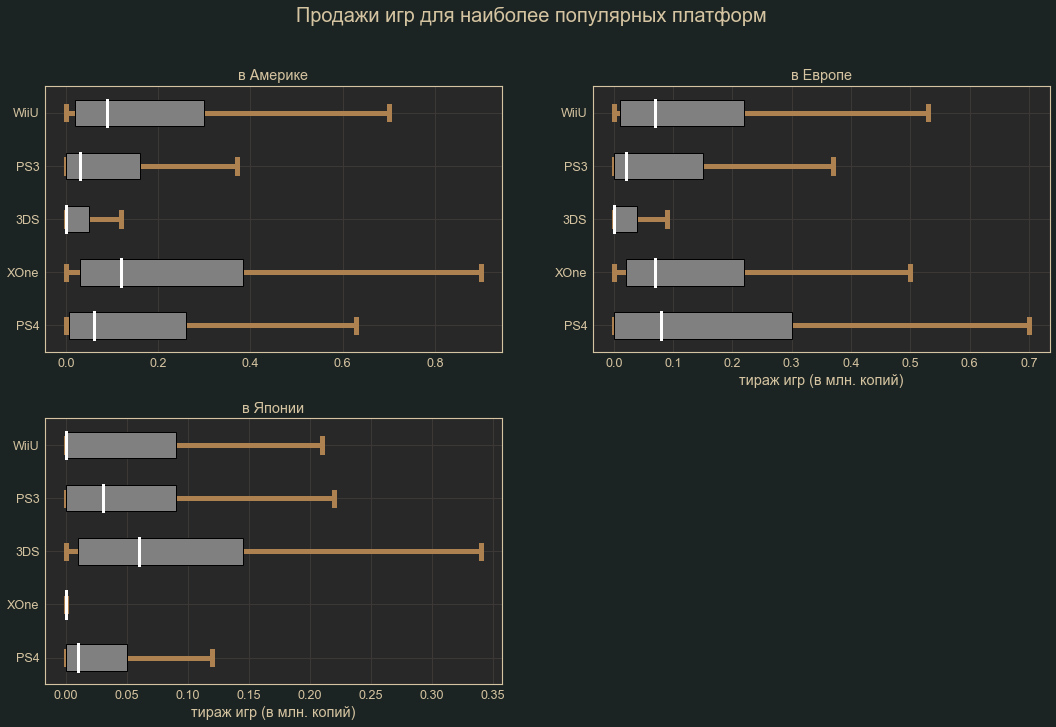

In [58]:
top_platf = ['PS4', 'XOne', '3DS', 'PS3', 'WiiU']
fig = plt.figure(figsize = (18, 11))
grid = fig.add_gridspec(2, 2, wspace = 0.2, hspace = 0.25)
fig.add_subplot(grid[0, 0]); fig.add_subplot(grid[0, 1]); fig.add_subplot(grid[1, 0])
fig.suptitle('Продажи игр для наиболее популярных платформ', fontsize = 20, y = 0.98)

for ax, reg, title in zip(fig.axes, ['na_sales', 'eu_sales', 'jp_sales'], ['в Америке', 'в Европе', 'в Японии']):
    bps = ax.boxplot([actual_period.loc[ actual_period['platform'] == pl, reg ] for pl in top_platf], 
                     showfliers = False, vert = False, patch_artist = True)
    ax.set(yticklabels = top_platf, title = title,
           xlabel = ['тираж игр (в млн. копий)' if title != 'в Америке' else ''][0])
    for whiskers in bps['whiskers']:
        whiskers = whiskers.set(color = '#ad8150', linewidth = 5)
    for caps in bps['caps']:
        caps = caps.set(color = '#ad8150', linewidth = 5)
    for medians in bps['medians']:
        medians = medians.set(color = 'white', linewidth = 3)
    for boxes in bps['boxes']:
        boxes = boxes.set(facecolor = 'grey')

display(fig)
plt.close(fig)

- Медиана по продажам в зависимости от жанра игры колебалась в пределах двухсот тысяч копий (в Европе и Северной Америке), в зависимости же от игровой платформы медиана колеблется лишь в пределах ста тысяч. Размах в продажах игр разного жанра мог достигать различия в 600 тысяч копий (на отметке в полтора межквартильных размаха), а для платформ показатели продаж более выровненные. Платформа - менее значимый фактор. 
- Хорошо видны предпочтения в разных регионах. PlayStation популярна в Европе, а Xbox - в Северной Америке. Nintendo 3DS - сугубо японская платформа, а Nintendo WiiU - интернациональный лидер, поэтому на ней перспективнее всего было бы выпускать онлайн-игры. Новое поколение PlayStation (PS4) уже распространилось по Европе и Северной Америке, в то время как в Японии старая версия (PS3) продолжает приносить большую прибыль, чем новая.

Связаны ли оценки критиков с платформой, на которой выходит игра? Поскольку наблюдений не так много, из графика рассеивания (scatter plot) может получиться что-то понятное.

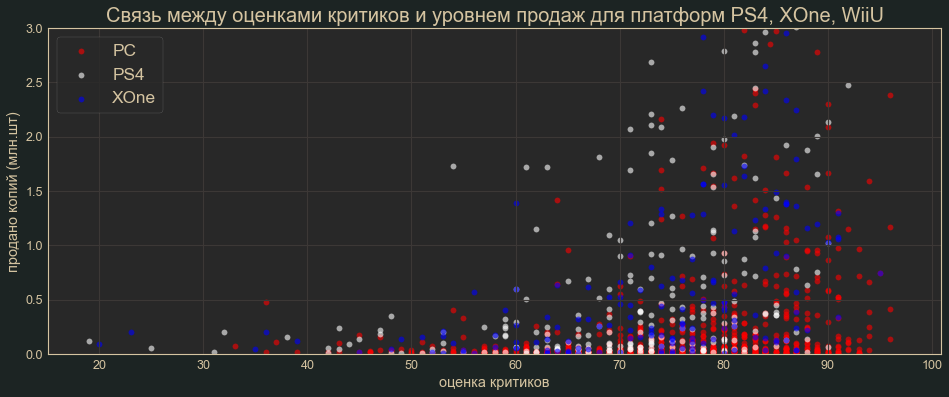

In [59]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.set(ylim = (0, 3), ylabel = 'продано копий (млн.шт)', xlabel  = 'оценка критиков')
ax.set_title('Связь между оценками критиков и уровнем продаж для платформ PS4, XOne, WiiU', fontsize = 20)
ax.scatter(x = df.loc[ df['platform'] == 'PC', 'critic_score' ], 
           y = df.loc[ df['platform'] == 'PC', 'total_sales' ], color = 'red', label = 'PC', alpha = 0.6)
ax.scatter(x = df.loc[ df['platform'] == 'PS4', 'critic_score' ], 
           y = df.loc[ df['platform'] == 'PS4', 'total_sales' ], color = 'white', label = 'PS4', alpha = 0.6)
ax.scatter(x = df.loc[ df['platform'] == 'XOne', 'critic_score' ], 
           y = df.loc[ df['platform'] == 'XOne', 'total_sales' ], color = 'blue', label = 'XOne', alpha = 0.6)
ax.legend(fontsize = 'xx-large')
display(fig)
plt.close(fig)

Никаких особенностей. Зато график отлично иллюстрирует, что между 70 и 90 баллами образуется своеобразный коридор, в который попадает подавляющее большинство игр с большими продажами. А игры с оценками ниже 70 практически никогда не будут продаваться хорошо. Впрочем, никаких гарантий балл от 70 до 100 не даёт - игр, которые балл получили, а много продаж, тем ни менее, не набрали, много (особенно на платформе PС). Косвенные подтверждения мы видели и раньше: низкое значение корреляции по Пирсону и график распределения, согласно которому целых 60% ото всех оценок - это от 70 до 90.

Scatter plot отлично показывает распределение выборочных значений, но по нему трудно рассудить о характеристиках выборки. Медианы продаж для разных платформ было видно на боксплотах, и мы видели, что они не равны. А могут ли быть равны средние значения пользовательских оценок для разных платформ? Возьмём две произольные платформы, например, 'XOne' и 'PC' и проведём тест на равенство выборочных средних. Для начала оценим вероятное значение var двух соответствующих ген.совокупностей.

In [60]:
first = actual_period.loc[ actual_period['platform'] == 'XOne', 'user_score' ].dropna()
second = actual_period.loc[ actual_period['platform'] == 'PC', 'user_score' ].dropna()

m.std_ddof([first, second])

13.809 17.424 
Дисперсии (190.7 и 303.59) отличаются более чем на 5%


Разница в 5 пунктов std - больше трети от дисперсии первой выборки (много). Для теста укажем параметр `equal_var = False`. 

In [61]:
result = st.ttest_ind(first, second, equal_var = False)
print("Существуют две ген.совокупности: все пользовательские оценки игр на\nплатформе 'XOne' & все пользовательские оценки игр на платформе 'PC' (за актуальный период)", end = '\n\n')
print("H0: Средние ген.совокупностей равны")
print('Вероятность наших выборок при допущении H0:', str(round(result.pvalue * 100, 3)) + '%')
[print('\t- Отклоняем H0') if result.pvalue < 0.05 else print('\t- Допускаем H0')];

Существуют две ген.совокупности: все пользовательские оценки игр на
платформе 'XOne' & все пользовательские оценки игр на платформе 'PC' (за актуальный период)

H0: Средние ген.совокупностей равны
Вероятность наших выборок при допущении H0: 14.76%
	- Допускаем H0


Тест показал, что гипотеза H0 может быть верна. Это значит что разницы между тем, как пользователи разных игровых платформ оценивают игры, нет. Судя по платформе, на которой игра выходит, нельзя предсказывать ожидаемую пользовательскую оценку.

## Возрастной рейтинг игры
<a id='target7'></a>

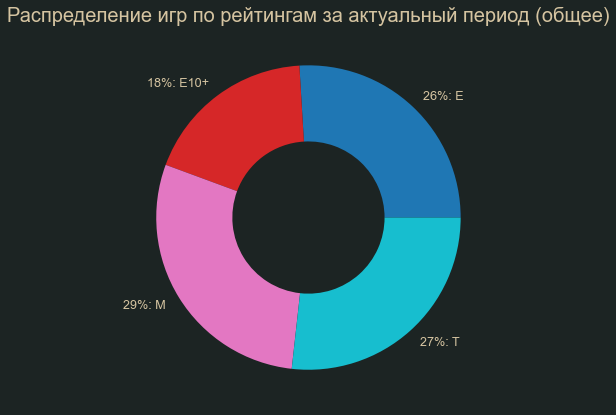

In [62]:
m.pie_chart(actual_period.loc[ actual_period['rating'] != 'RP' ], 'rating',
          title = 'Распределение игр по рейтингам за актуальный период (общее)')

Сравним с помощью боксплотов распределение продаж в зависимости от рейтинга в каждом регионе.

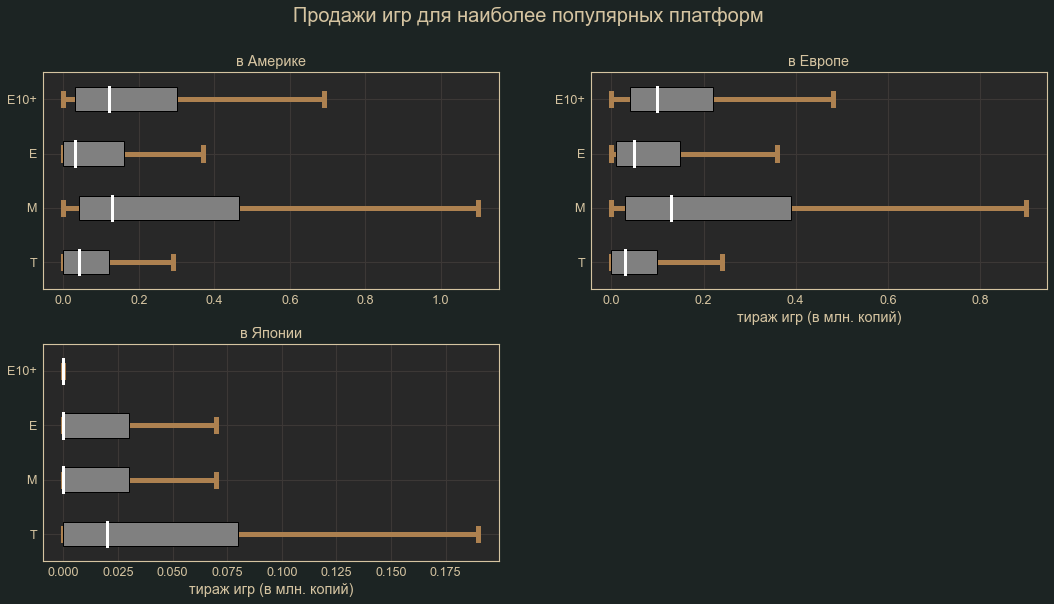

In [63]:
ratings = ['T', 'M', 'E', 'E10+']
fig = plt.figure(figsize = (18, 9))
grid = fig.add_gridspec(2, 2, wspace = 0.2, hspace = 0.25)
fig.add_subplot(grid[0, 0]); fig.add_subplot(grid[0, 1]); fig.add_subplot(grid[1, 0])
fig.suptitle('Продажи игр для наиболее популярных платформ', fontsize = 20, y = 0.98)

for ax, reg, title in zip(fig.axes, ['na_sales', 'eu_sales', 'jp_sales'], ['в Америке', 'в Европе', 'в Японии']):
    bps = ax.boxplot([actual_period.loc[ actual_period['rating'] == rat, reg ] for rat in ratings], 
                     showfliers = False, vert = False, patch_artist = True)
    ax.set(yticklabels = ratings, title = title,
           xlabel = ['тираж игр (в млн. копий)' if title != 'в Америке' else ''][0])
    for whiskers in bps['whiskers']:
        whiskers = whiskers.set(color = '#ad8150', linewidth = 5)
    for caps in bps['caps']:
        caps = caps.set(color = '#ad8150', linewidth = 5)
    for medians in bps['medians']:
        medians = medians.set(color = 'white', linewidth = 3)
    for boxes in bps['boxes']:
        boxes = boxes.set(facecolor = 'grey')

display(fig)
plt.close(fig)

Для справки:
- E («Для всех») — Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
- E10+ («Для всех от 10 лет и старше») — Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови.
- T («Teen») — «Подросткам»: Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- M («Mature») — «Для взрослых»: Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

In [64]:
df[ df['rating'] != 'RP'].query('genre == "Role-Playing"')['rating'].value_counts()

T       437
M       167
E       120
E10+    114
RP        0
EC        0
AO        0
Name: rating, dtype: int64

- На японском рынке, судя по всему, игры рейтинга E и M почти не представлены - половина от всех игр с этим рейтингом не набрали в Японии никаких продаж. Следует ли из этого, что в Японии недолюбливают как слишком инфантильные, так и слишком неприкрашенные игры, а строго придерживаются золотой середины между ними (жанр 'Teen')? Скорее всего, нет. Рейтинг ESRB присваивает играм организация из Штатов. Скорее всего, рейтинг присваиваивается преимущественно американским и европейским играм, которые, если они уже имеют какой-то успех, могут зайти и на японский рынок и "занести" в него таким образом своё значение 'rating'. Действительно, играм жанра 'Role-Playing' (самого популярного жанра в Японии) чаще всего присваивается рейтинг T. Наверное, поэтому показатели продаж именно у этого рейтинга в Японии не такие странные, как показатели для остальных рейтингов.
- За игры, предлагающие экшн (жанр 'M'), европейские и американские игроки готовы платить золотом. Медианы у жанров 'M' и 'E10' можно считать равными, но если уж игра рейтинга 'M' (экшн) сделана хорошо, то и потенциал продаж у неё значительно выше, чем у игр любых других рейтингов. Поэтому при равных медианах, коробка и правый ус у боксплота для рейтинга 'M' простирается намного дальше, чем у жанра 'E10'.

In [65]:
print('За актуальный период:')
genr_and_genm = pd.concat([actual_period['genre'].value_counts(), actual_period.loc[ actual_period['rating'] == 'M', 'genre'].value_counts()], axis = 1)
genr_and_genm[2] = genr_and_genm.iloc[:, 1].div(genr_and_genm.iloc[:, 0]).apply(lambda x: round(x * 100, 1))
genr_and_genm.columns = ['всего игр', "игр с рейтингом 'M'", "доля игр с рейтингом 'M'"]
genr_and_genm.sort_values(by = "доля игр с рейтингом 'M'", ascending = False)

За актуальный период:


,всего игр,игр с рейтингом 'M',доля игр с рейтингом 'M'
Shooter,187,145,77.5
Action,766,160,20.9
Role-Playing,293,53,18.1
Adventure,245,26,10.6
Fighting,80,4,5.0
Misc,155,4,2.6
Racing,85,2,2.4
Strategy,56,1,1.8
Platform,74,0,0.0
Puzzle,17,0,0.0


## Резюме
<a id='target99'></a>

- тренд на падение продаж как в абсолютных цифрах, так и в усреднённых, начавшийся в 2009, продолжается до сих пор
- если текущее состояние рынка компьютерных игр нужно заключить в исторические рамки, то наиболее обоснованно было бы начать отсчёт актуального периода с 2013 года.

Жанр:
- в Европе и Северной Америке ожидаем падение популярности Action, рост популярности Shooter, в течение нескольких лет вероятно падение популярности Sports в Европе
- в Европе положительным фактором к прибыльности будет, если игра - жанра Racing или Shooter, в японии - жанра Misc или Role-Playing, в Северной Америке - жанра Sports или Shooter. Нужно иметь в виду, что мода в Европе и Северной Америке на жанры более изменчива, чем в Японии.
- в Европе и Северной Америке жанр Action может быть недооценён из-за большого кол-ва выпущенных игр. Конкуренция большая, однако если есть уверенность в том, что игра хорошая и выделяется на фоне остальных - то она может иметь коммерческий успех, так как средние показатели, несмотря на большое количество игр, находятся на относительно высоком уровне. 
- то же самое можно сказать про игры жанра Shooter, большинство из которых имеет рейтинг M. Игры с рейтингом M становятся в разы более перспективными как только пересекают медиану рейтинга по продажам. Поэтому если заранее известно, что игра жанра Shooter достаточно хороша и наверняка будет продана в тираже не меньше 150 тысяч копий, то есть смысл в неё вложиться.
- распределение продаж в зависимости от жанра имеет в несколько раз больший межквартильный размах, чем распределение в зависимости от платформы или рейтинга. Это говорит о том, что жанр является одним из определяющих факторов при прогнозировании успешности игры.
- при прогнозировании оценок для новых игр не стоит слишком полагаться на жанр. Но если всё-таки делать прогноз, то на более благосклонный приём со стороны игроков могут рассчитывать игры жанра Adventure, Puzzle, Role-Playing, Misc и Action, а строгий суд, скорее всего, ожидает игры жанров Sports, Simulation, Racing, Strategy, Shooter.

Оценки игроков и критиков:
- непопулярным и камерным играм ограниченное число их фанатов зачастую создаёт высокий пользовательский рейтинг, что видно на примере среднего рейтинга игр жанра Puzzle. 
- оценки критиков более совпадают с рыночной оценкой игры, особенно в Северной Америке. В Европе для предсказания коммерческой успешности игры можно отталкиваться от оценки критиков, но только если она выше 80 пунктов. 
- никаких гарантий балл от 70 до 100 не даёт - игр, которые получили высокую оценку, а много продаж, тем ни менее, не набрали, много, особенно когда речь о пользовательской оценке. 
- в Японии можно ориентироваться как на оценку критиков, так и на оценку пользователей, однако лишь для предсказания успешности игр, выпущенных в Японии. У зарубежных игр на японском рынке прогнозы плохие.

Игровая платформа:
- то, что платформа популярна у разработчиков не означает, что она популярна у игроков. Например, за актуальный период 16% от всех игр вышли на платформе PSV (в этом отношении она занимает второе место после PS4). Но по числу проданных копий PSV занимает лишь восьмое место (из одиннадцати). 
- платформа - региональный фактор. В Европе выгоднее всего выходить на PS4, в Северной Америке на XOne, в Японии на 3DS. 
- пользовательская оценка игры не зависит от игровой платформы.




[В начало](#target1) 